# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#Seasonal-adjustment" data-toc-modified-id="Seasonal-adjustment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Seasonal adjustment</a></span></li></ul></li><li><span><a href="#Get-the-data-from-covidlive.com" data-toc-modified-id="Get-the-data-from-covidlive.com-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data from covidlive.com</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#!!!-CHECK---Raw-daily-new-cases/new-deaths---past-few-days" data-toc-modified-id="!!!-CHECK---Raw-daily-new-cases/new-deaths---past-few-days-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>!!! CHECK - Raw daily new cases/new deaths - past few days</a></span></li><li><span><a href="#Supporting-functions-for-accessing-the-corrected-data-for-a-period" data-toc-modified-id="Supporting-functions-for-accessing-the-corrected-data-for-a-period-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Supporting functions for accessing the corrected data for a period</a></span></li></ul></li><li><span><a href="#Weekly-charts---cases---deaths---tests---for-the-whole-pandemic" data-toc-modified-id="Weekly-charts---cases---deaths---tests---for-the-whole-pandemic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weekly charts - cases - deaths - tests - for the whole pandemic</a></span></li><li><span><a href="#Recent-daily-charts---cases,-deaths-and-tests" data-toc-modified-id="Recent-daily-charts---cases,-deaths-and-tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recent daily charts - cases, deaths and tests</a></span></li><li><span><a href="#RAT-+-PCR" data-toc-modified-id="RAT-+-PCR-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>RAT + PCR</a></span></li><li><span><a href="#Bar-Charts---the-latest-cases,-deaths-and-tests" data-toc-modified-id="Bar-Charts---the-latest-cases,-deaths-and-tests-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bar Charts - the latest cases, deaths and tests</a></span></li><li><span><a href="#Line-plots---cases,-deaths-and-tests" data-toc-modified-id="Line-plots---cases,-deaths-and-tests-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Line plots - cases, deaths and tests</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Explore-cases-to-deaths" data-toc-modified-id="Explore-cases-to-deaths-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Explore cases to deaths</a></span></li><li><span><a href="#Vaccination-plots" data-toc-modified-id="Vaccination-plots-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Vaccination plots</a></span><ul class="toc-item"><li><span><a href="#Get-data" data-toc-modified-id="Get-data-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Bar plots</a></span></li><li><span><a href="#Timeline-plots" data-toc-modified-id="Timeline-plots-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Timeline plots</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Hospitalised</a></span><ul class="toc-item"><li><span><a href="#Get-the-hospital-data" data-toc-modified-id="Get-the-hospital-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Get the hospital data</a></span></li><li><span><a href="#Recent-hospital-counts-daily" data-toc-modified-id="Recent-hospital-counts-daily-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Recent hospital counts daily</a></span></li><li><span><a href="#Progression" data-toc-modified-id="Progression-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Progression</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-latest-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-latest-raw-SOI-data-against-raw-case-count-data-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Check latest raw SOI data against raw case count data</a></span></li><li><span><a href="#Plot-overseas-infections" data-toc-modified-id="Plot-overseas-infections-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>Plot overseas infections</a></span></li></ul></li><li><span><a href="#Local-cases/transmission" data-toc-modified-id="Local-cases/transmission-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Local cases/transmission</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-for-local-transmission" data-toc-modified-id="Create-dataframe-for-local-transmission-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Create dataframe for local transmission</a></span></li><li><span><a href="#And-plot" data-toc-modified-id="And-plot-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>And plot</a></span></li></ul></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#New-cases---daily-growth-rate" data-toc-modified-id="New-cases---daily-growth-rate-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>New cases - daily growth rate</a></span></li><li><span><a href="#Five-day-on-five-day-growth-rate---a-good-proxy-for-$R_{eff}$" data-toc-modified-id="Five-day-on-five-day-growth-rate---a-good-proxy-for-$R_{eff}$-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>Five day on five day growth rate - a good proxy for $R_{eff}$</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-16.4"><span class="toc-item-num">16.4&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from typing import List, Dict, Tuple, Set, Optional, Any, Iterable, Callable

# local imports
sys.path.append(r"../bin")
import plotstuff as ps
import Henderson

# pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use("ggplot")

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter
munits.registry[pd.Period] = converter

/Users/bryanpalmer/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
!file `which python`

/Users/bryanpalmer/miniconda3/bin/python: Mach-O 64-bit executable x86_64


### Other useful information

In [3]:
# save location
CHART_DIRECTORY = "../charts"
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += "/!AS2-"

SOURCE = "Source: https://covidlive.com.au/"

state_order = ["NSW", "Victoria", "Queensland", "WA", "SA", "Tasmania", "ACT", "NT"]
state_palette = {
    # colours from the R strayr package
    "NSW": '#87ceeb',
    "Victoria": '#000080', 
    "Queensland": '#800000', 
    "WA": '#fecb29', 
    "SA": '#dc0014', 
    "Tasmania": '#006a4e', 
    "ACT": '#94c949', 
    "NT": '#e65a00',
    "Australia": '#000000',
}

# used in charts of the recent period
RECENT = 92  # days

# For hospital data we want to compare the DELTA wave
DELTA_RECENT = (datetime.date.today() - datetime.date(2021, 6, 15)).days

# standard plot settings - used in calls to ps.finalise_plot()
std_barchart_settings = {
    "chart_directory": CHART_DIRECTORY,
    "rfooter": SOURCE,
    "show": True,
}

std_plot_settings = {
    "margins": 0.02,
    **std_barchart_settings,
}

# Assumed mean times to event from diagnosis (positive PCR test result)
# need more empirical data for this 
# Also note, may vary with COVID variant
TO_HOSPITAL = 9 # days
TO_DEATH = 14 # days

### Warnings

In [4]:
warning_count = 0
warnings = set()


def warn(message: str) -> None:
    global warning_count
    if message:
        if message not in warnings:
            warning_count += 1
        print(message)
        warnings.add(message)
    return None


def print_warnings() -> None:
    if warning_count == 0:
        return None
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')
    for m in warnings:
        print(m)
    return None

### State populations and per capita calculations

In [5]:
# data compiled from ABS tables for age by year by state
# https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/dec-2020#data-download
# see notebook in directory ../abs, which generates the dictionaries below.

# Constants across all tests
state_pop = {
    "NSW": 8167063,
    "Victoria": 6693860,
    "Queensland": 5175273,
    "SA": 1770279,
    "WA": 2664227,
    "Tasmania": 540536,
    "NT": 246223,
    "ACT": 431215,
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

eligible_pop = {
    "NSW": 6566315,
    "Victoria": 5407782,
    "Queensland": 4112658,
    "SA": 1440472,
    "WA": 2115294,
    "Tasmania": 440192,
    "NT": 190651,
    "ACT": 344008,
}
eligible_pop["Australia"] = sum(eligible_pop.values())
print(f'Australian eligible population: {eligible_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0: "Unit",
    3: "Thousand",
    6: "Million",  # beyond here is a bit silly ...
    9: "Billion",
    12: "Trillion",
    15: "Quadrillion",
    18: "Quintillion",
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor
eligible_pop = pd.Series(eligible_pop) / factor

Australian population: 25,688,676
Australian eligible population: 20,617,372


## Useful functions

### Seasonal adjustment

In [6]:
def weekly_adjust(series:pd.Series) -> pd.Series:
    """A weekly, multiplicative, seasonal adjustment to a time series.
       Assumes all values in series are > 0."""
    
    decomp = seasonal_decompose(series, period=7, model='multiplicatve')
    adjusted = series / decomp.seasonal
    #print(decomp.seasonal)
    return adjusted

## Get the data from covidlive.com

In [7]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""

    # get the data
    url = "https://covidlive.com.au/covid-live.json"
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)

    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f"Warning: There are records into the future?")
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [8]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [9]:
# Quick peak at the data columns
raw_json_data.columns

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT', 'VACC_FIRST_DOSE_CNT_12_15',
       '

In [10]:
# Quick look at the categorising column
map_from = sorted(raw_json_data.NAME.unique())
map_to = sorted(raw_json_data.CODE.unique())
state_name_map = {f: t for f, t in zip(map_from, map_to)}
state_name_map

{'ACT': 'ACT',
 'Australia': 'AUS',
 'NSW': 'NSW',
 'NT': 'NT',
 'Queensland': 'QLD',
 'SA': 'SA',
 'Tasmania': 'TAS',
 'Victoria': 'VIC',
 'WA': 'WA'}

## Capture cumulative and daily data for selected columns

### Extraction

In [11]:
selected_cols = {
    # column name      # plain English for charts
    "CASE_CNT": "cases",
    "DEATH_CNT": "deaths",
    "TEST_CNT": "tests",
}

In [12]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = raw_json_data.pivot(
        index="REPORT_DATE", columns="NAME", values=item
    ).sort_index(ascending=True)

    # if state totals have NaNs, change a non-NaN 'Australia' to NaN
    states = table.columns.to_list()
    if "Australia" in states:
        states.remove("Australia")
        odd_rows = table[states].isna().any(axis=1) & table["Australia"].notna()
        if odd_rows.any():
            fix_these_rows = odd_rows[odd_rows].index
            # warn(f'Nullifying these Australian totals in {item} '
            #     f'{fix_these_rows.to_list()}')
            table.loc[fix_these_rows, "Australia"] = np.nan

    # drop all-NaN rows
    missing_rows = table.isna().all(axis=1)
    if missing_rows.any():
        drop_these_rows = missing_rows[missing_rows].index
        # warn(f'Dropping all-NaN rows from {item}: {drop_these_rows.to_list()}')
        table.drop(drop_these_rows, inplace=True)

    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(
            f"We are missing the latest {item} "
            f'for {", ".join(situation[situation].index.to_list())}'
        )

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(
            f"Lastest value less than its predecessor in {item} "
            f'for {", ".join(not_max[not_max].index.to_list())}'
        )

    return table

In [13]:
def get_item(item, raw_json_data):
    """Return a DataFrame dates-x-states for item.
       Ensure early NaNs are mapped to zero.
       But keep any NaNs at the end of the table."""

    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()

    data = raw.ffill().fillna(0).where(~end_nan_mask, other=np.nan)

    return data

In [14]:
def get_data_with_adjustments():
    cum_u = {}
    daily_u = {}
    daily_c = {}
    cum_c = {}

    for item in selected_cols.keys():
        # get the raw cumulative data
        cum_u[item] = get_item(item, raw_json_data)

        # adjusted daily and cumulative data (for corrections)
        daily_u[item], daily_c[item], cum_c[item] = ps.dataframe_correction(
            cum_u[item], verbose=False
        )

    return cum_u, daily_u, daily_c, cum_c


cum_u, daily_u, daily_c, cum_c = get_data_with_adjustments()

### !!! CHECK - Raw daily new cases/new deaths - past few days

In [15]:
def highlighter(series:pd.Series) -> List[str]:
    """Produce a list of CSS highlight code for a given pandas Series of floats."""
    h = lambda x: '' if x >= 0 else 'background: orange' if x < 0 else 'background: tomato'
    return [h(number) for number in series]

# apply highlighter to the tail of a dataframe to identify anomalies
cum_u["CASE_CNT"].diff()[-8:].style.apply(highlighter).format("{:,.0f}")

In [16]:
cum_u["DEATH_CNT"].diff()[-8:].style.apply(highlighter).format("{:,.0f}")

In [17]:
daily_deaths = cum_u["DEATH_CNT"].diff()
daily_deaths = daily_deaths[daily_deaths.index >= '2022-01-01'].sum()
daily_deaths

NAME
ACT             14.0
Australia     2008.0
NSW            915.0
NT               4.0
Queensland     289.0
SA             127.0
Tasmania         6.0
Victoria       653.0
WA               0.0
dtype: float64

In [18]:
(daily_deaths[daily_deaths.index >= '2022-01-01']['Australia'] < 0).sum()

0

In [19]:
daily_deaths = cum_u["DEATH_CNT"].diff()
daily_deaths = daily_deaths[(daily_deaths.index > '2021-06-01')
                            & (daily_deaths.index < '2022-01-01')].sum()
daily_deaths

NAME
ACT             12.0
Australia     1329.0
NSW            609.0
NT               1.0
Queensland       0.0
SA               2.0
Tasmania         0.0
Victoria       705.0
WA               0.0
dtype: float64

### Supporting functions for accessing the corrected data for a period

In [20]:
def _prune(series, start, stop):
    s = series
    if start:
        s = series[series.index >= pd.Timestamp(start)]
    if stop:
        s = s[s.index <= pd.Timestamp(stop)]
    return s


def _get_data(item, state, start, stop):
    data = daily_c[item][state].dropna()  # for NaNs at series end
    return _prune(data, start, stop)


def _get_data_direct(item, state, start, stop):
    data = get_item(item, raw_json_data)[state].dropna()
    return _prune(data, start, stop)

## Weekly charts - cases - deaths - tests - for the whole pandemic

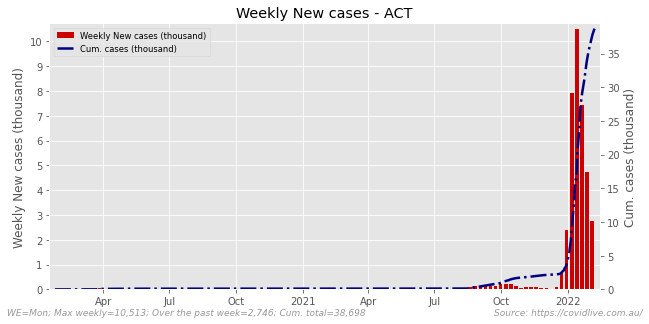

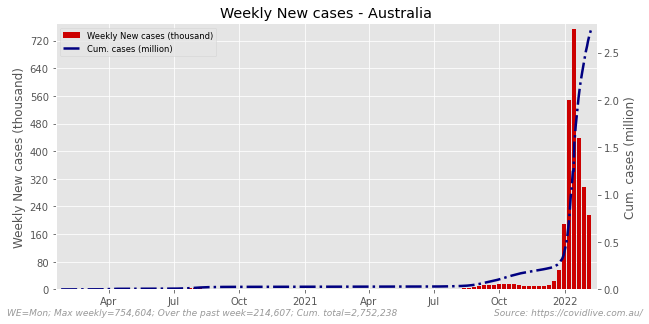

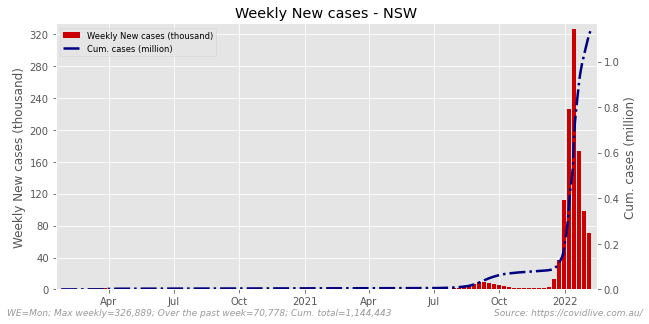

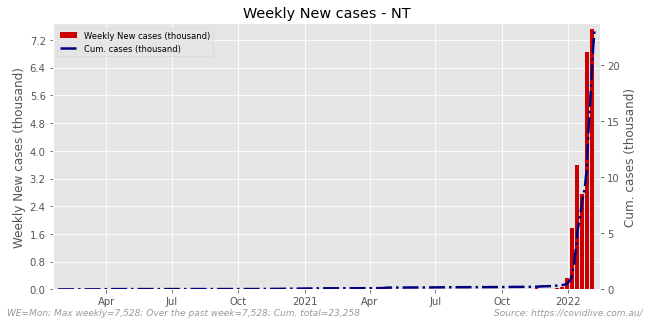

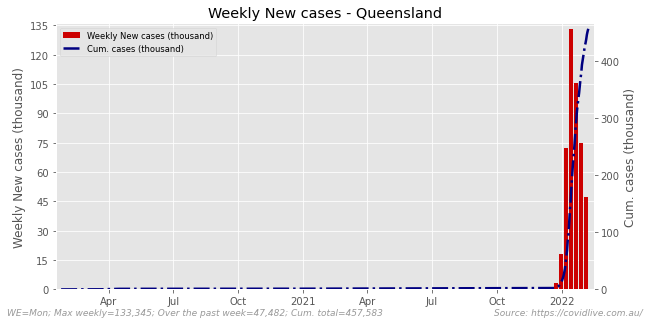

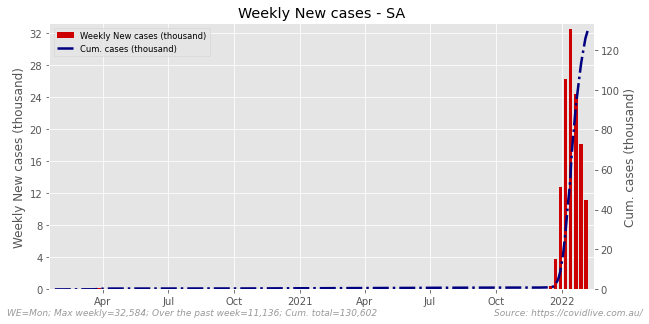

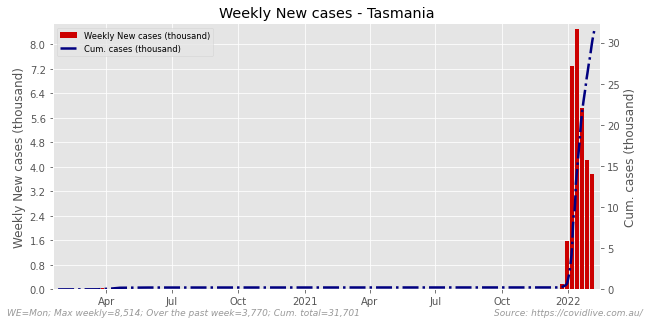

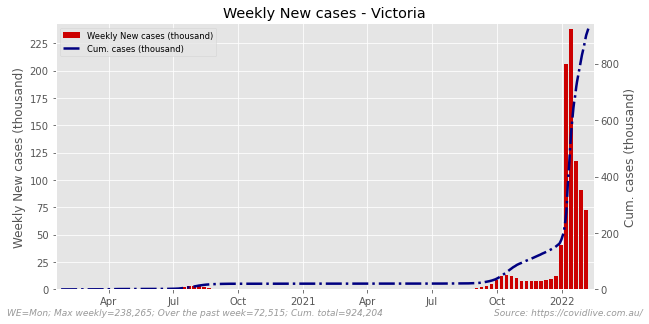

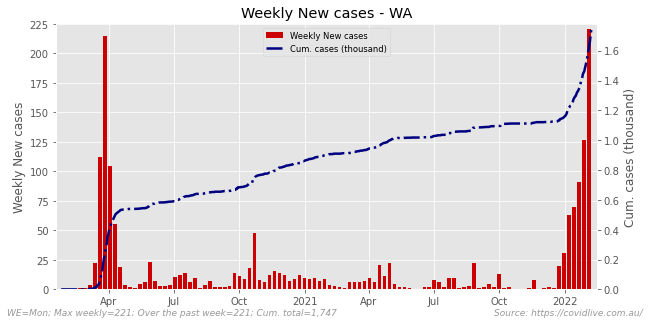

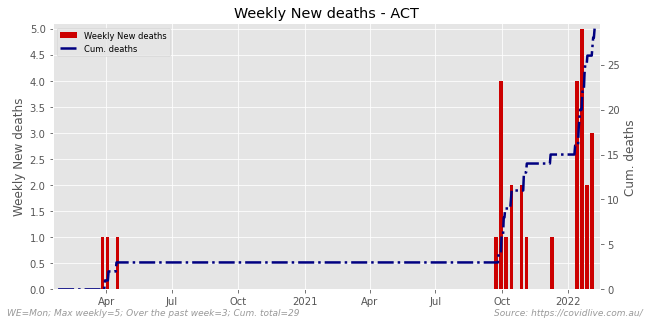

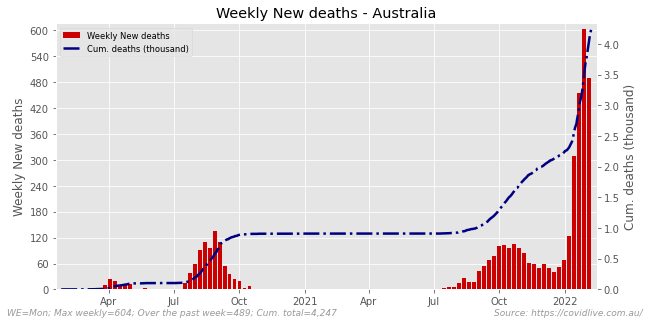

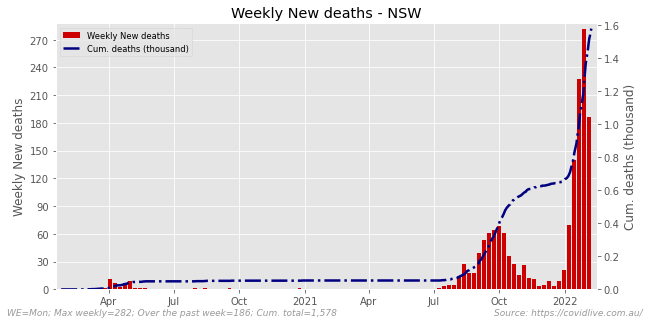

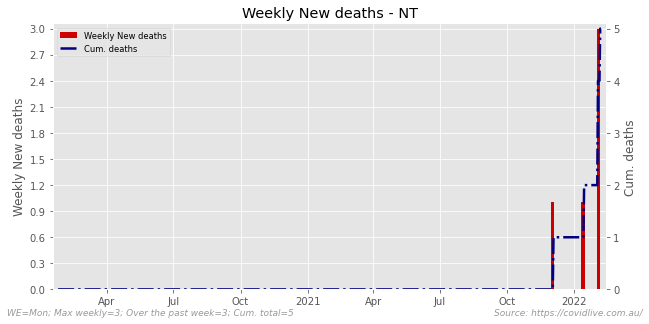

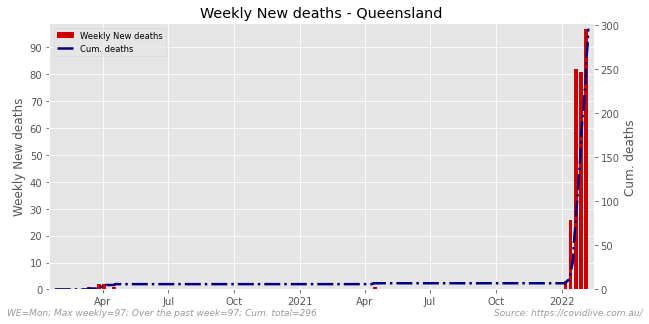

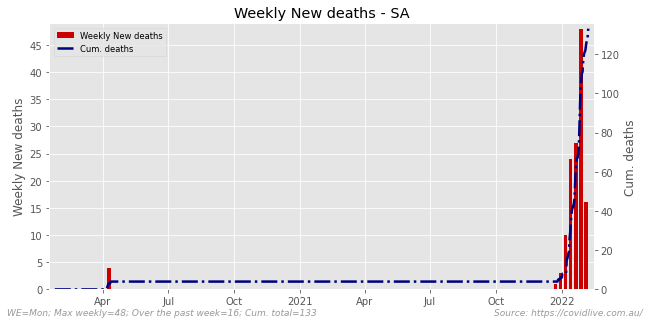

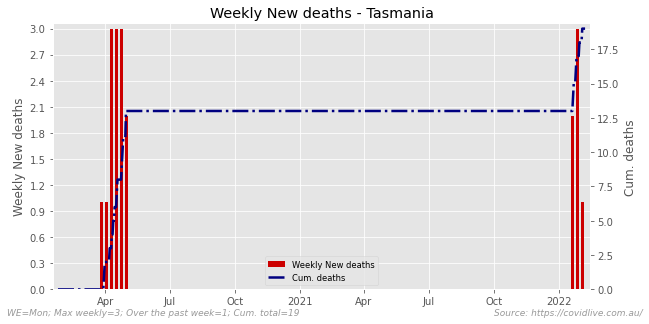

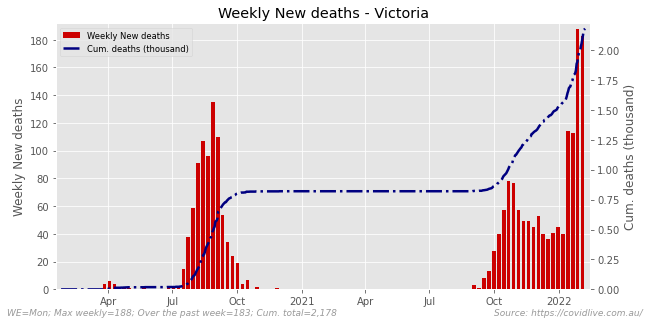

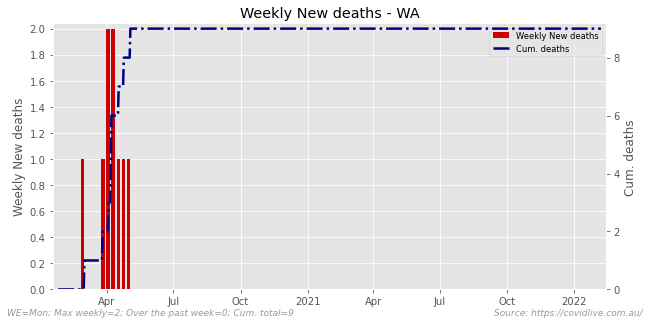

In [21]:
# Note: using adjusted here ...

ps.loop_over_frame(df=daily_c['CASE_CNT'], 
                desc='cases', 
                func=ps.plot_weekly, 
                scale_y=True,
                **std_plot_settings)

ps.loop_over_frame(df=daily_c['DEATH_CNT'], 
                desc='deaths', 
                func=ps.plot_weekly, 
                scale_y=True,
                **std_plot_settings)

## Recent daily charts - cases, deaths and tests

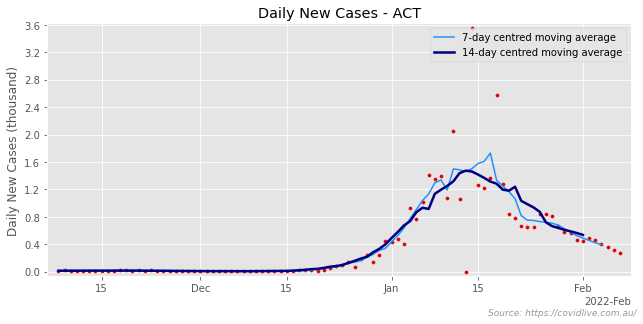

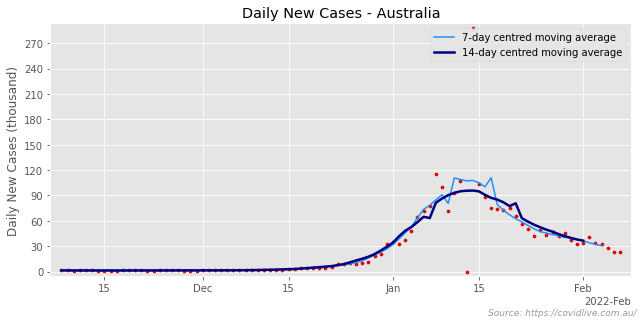

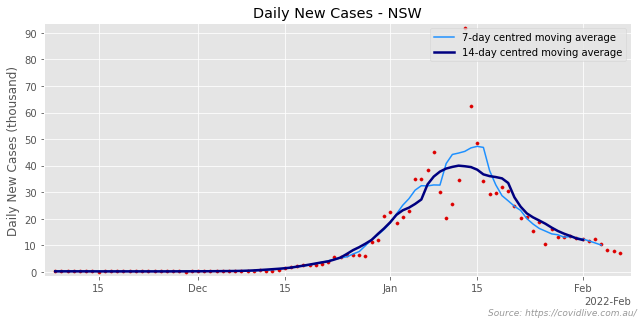

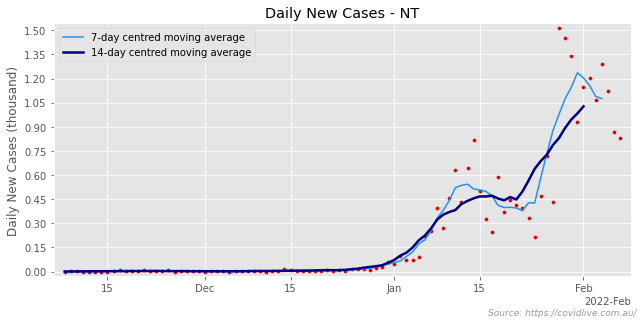

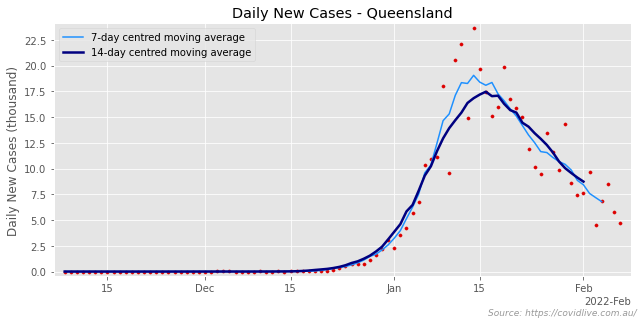

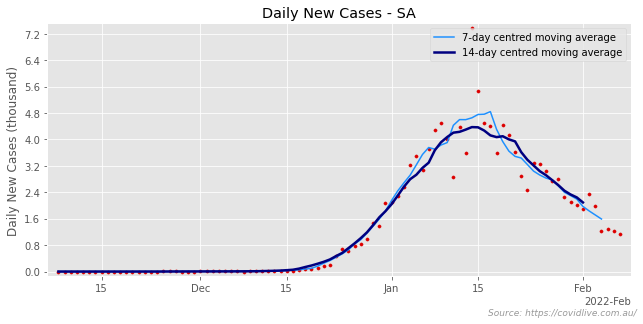

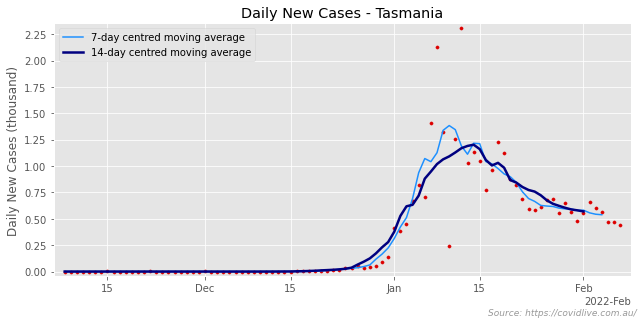

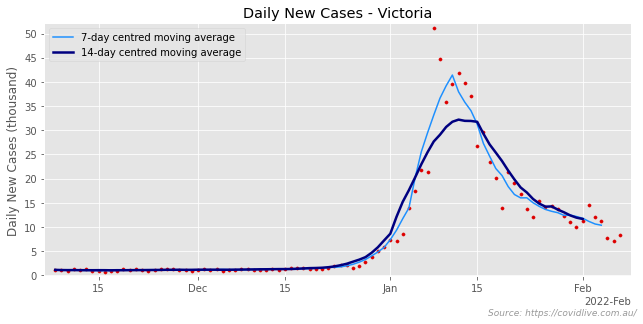

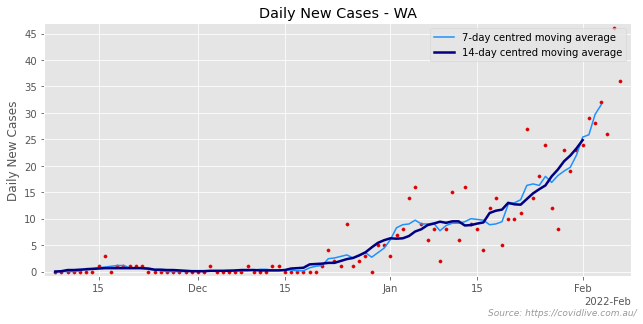

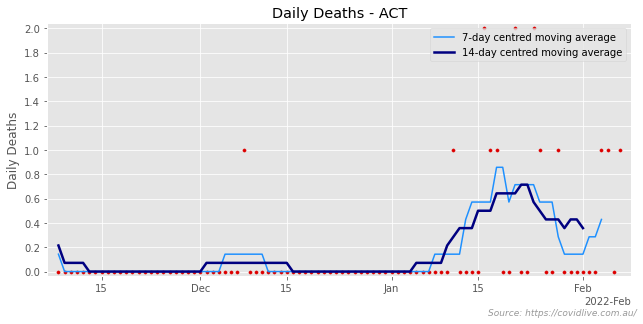

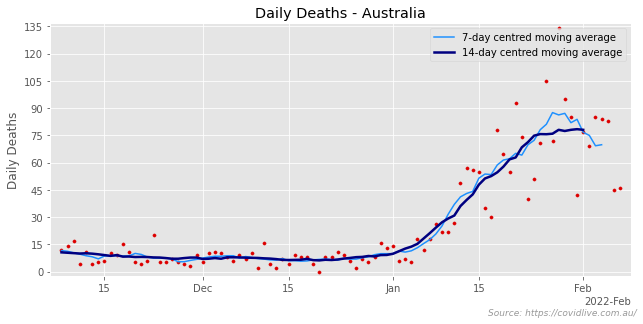

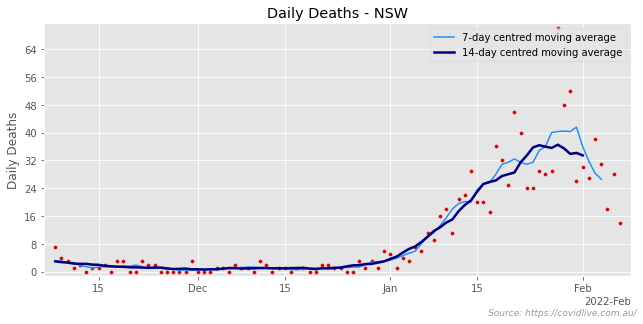

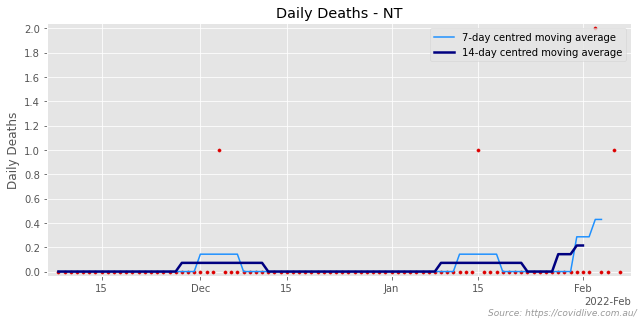

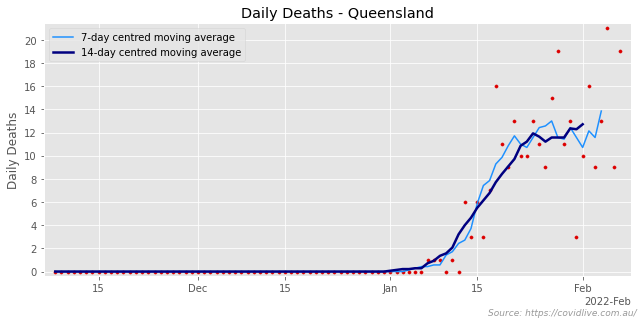

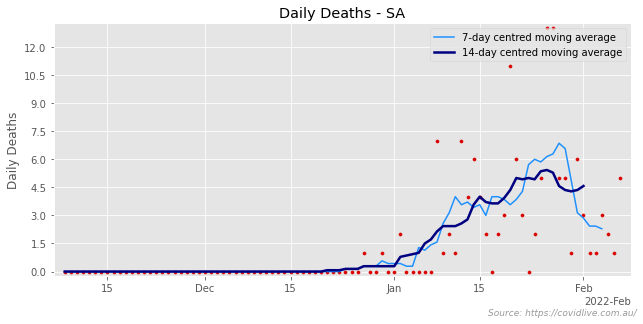

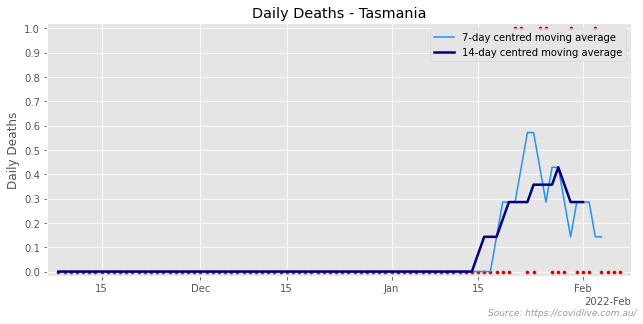

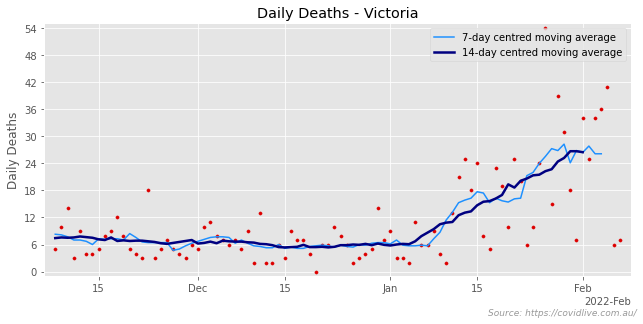

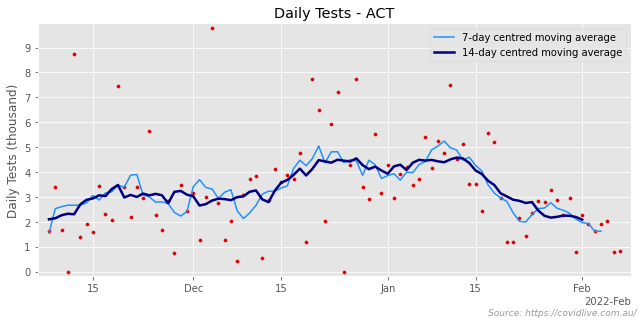

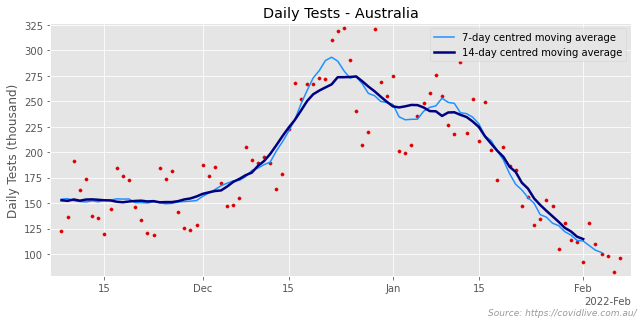

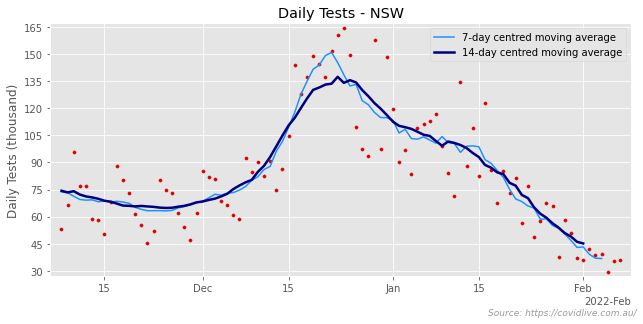

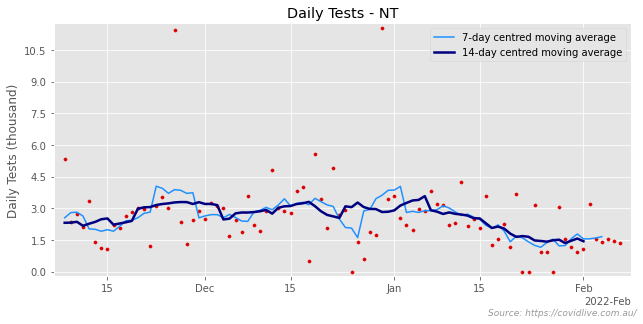

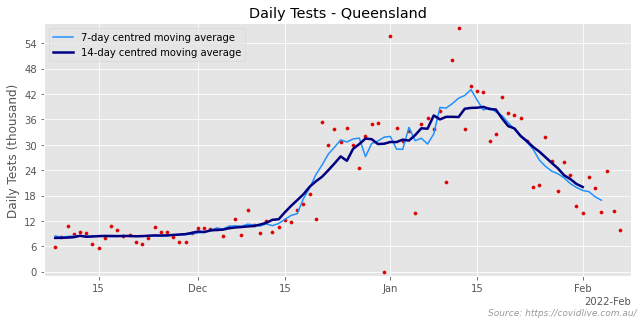

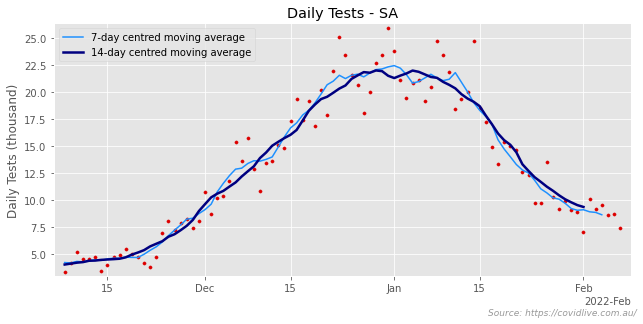

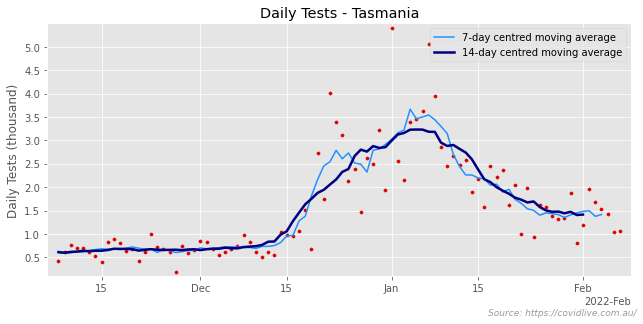

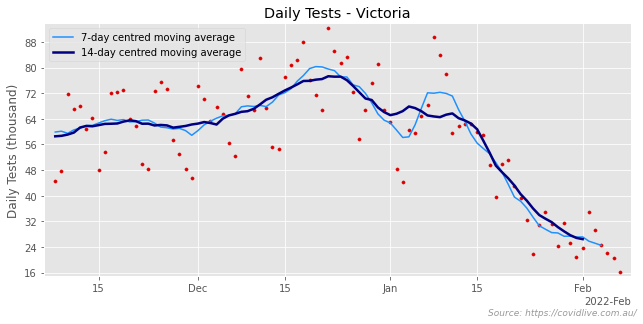

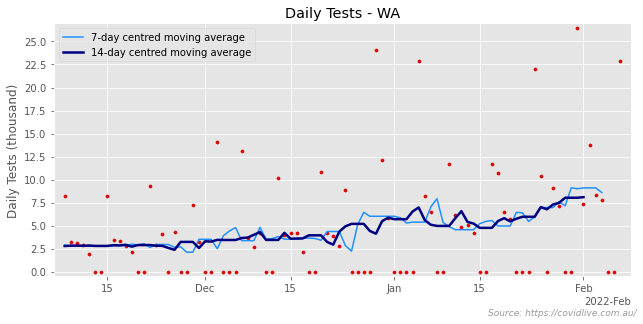

In [22]:
arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': ps.plot_series_with_ma,
}


# Let's use negative and outlier corrected data for deaths and tests
ps.loop_over_frame(daily_c["CASE_CNT"], 'Daily New Cases', **arguments)
ps.loop_over_frame(daily_c["DEATH_CNT"], 'Daily Deaths', **arguments)
ps.loop_over_frame(daily_c["TEST_CNT"], 'Daily Tests', **arguments)

## RAT + PCR

In [23]:
daily = daily_c['CASE_CNT']
RAT_START = '2022-01-08'
rat = get_item("PROB_CASE_CNT", raw_json_data)
rat = rat.reindex(rat.index.union(daily.index), fill_value=np.nan).sort_index()
daily_rat = rat.ffill().diff()
daily_rat = daily_rat.where(daily_rat > 0, other=0) # KLUDGE
len(daily_rat)

745

In [24]:
daily_pcr = daily_u['CASE_CNT'] - daily_rat
daily_pcr = daily_u['CASE_CNT'].where(daily_pcr.isna(), other=daily_pcr)
print(len(daily_rat), len(daily_pcr))

745 745


55 55


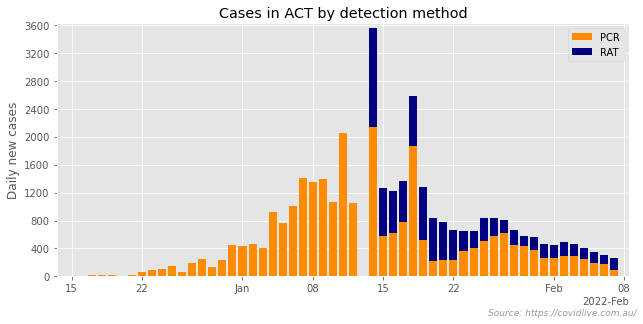

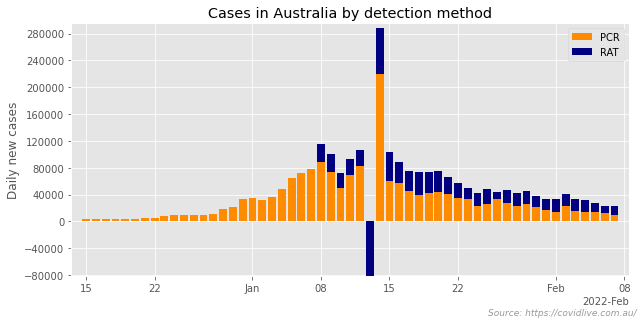

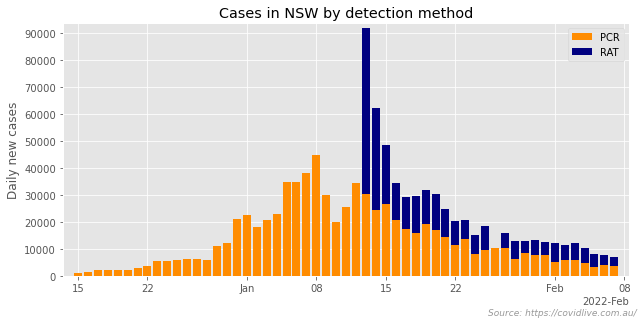

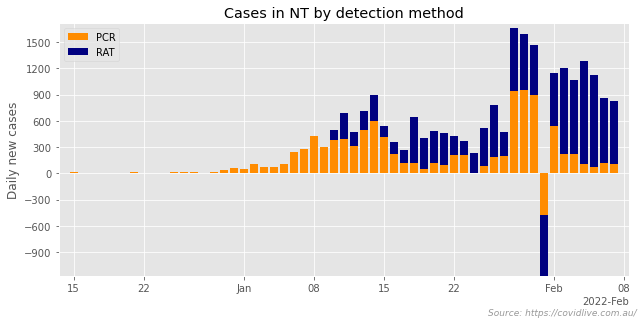

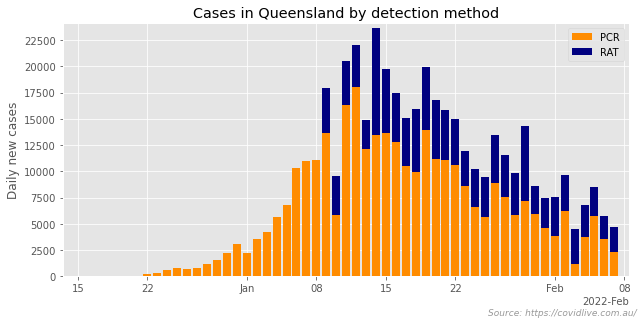

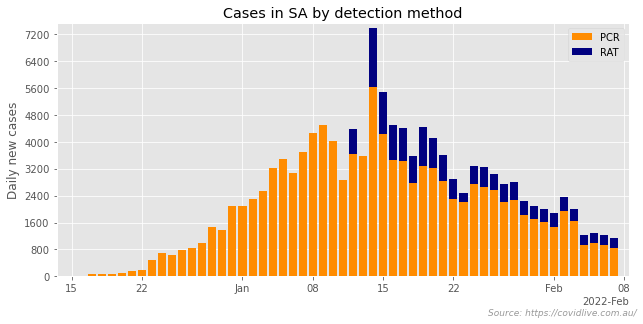

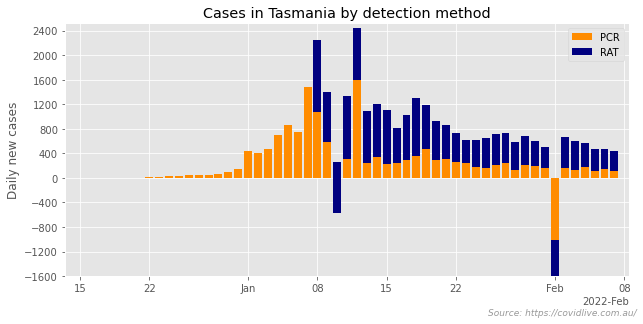

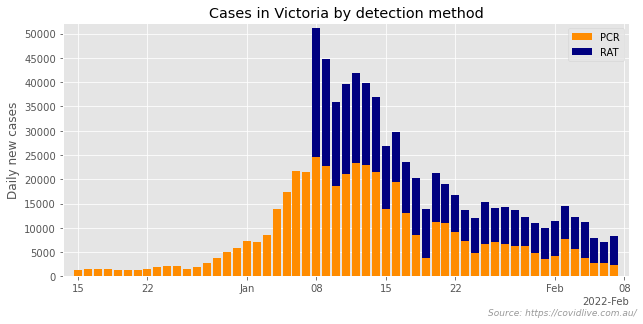

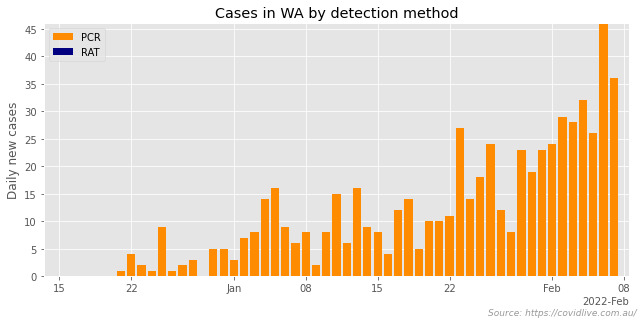

In [25]:
RAT_PLOT_FROM = '2021-12-15'
daily_rat = daily_rat[daily_rat.index >= RAT_PLOT_FROM]
daily_pcr = daily_pcr[daily_pcr.index >= RAT_PLOT_FROM]
print(len(daily_rat), len(daily_pcr))
for state in daily_pcr.columns:
    fig, ax = plt.subplots()
    ax.bar(daily_pcr.index, daily_pcr[state], label='PCR', color='darkorange')
    ax.bar(daily_rat.index, daily_rat[state], bottom=daily_pcr[state], label='RAT', color='navy')
    ax.legend(loc='best')
    ps.finalise_plot(ax,
                    title=f'Cases in {state} by detection method',
                     ylabel='Daily new cases',
                    **std_plot_settings)

## Bar Charts - the latest cases, deaths and tests

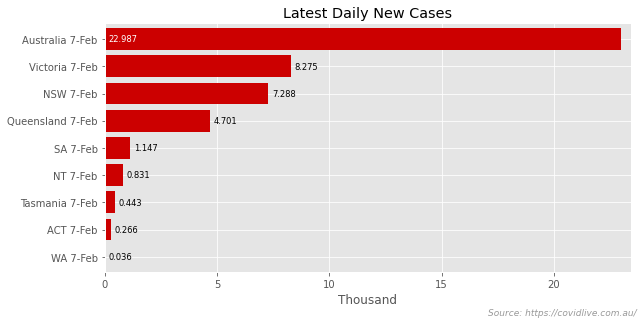

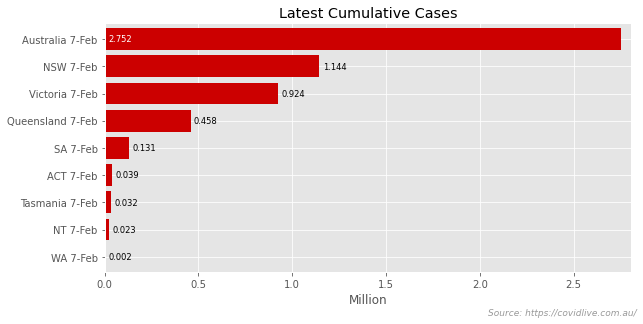

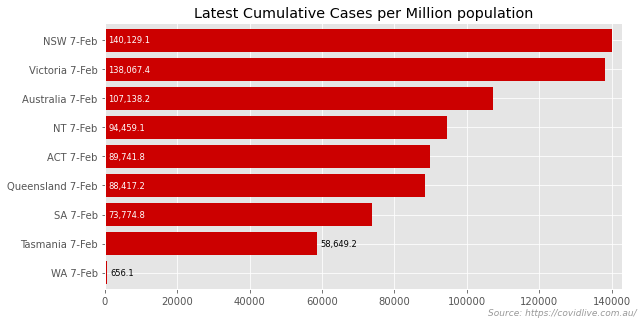

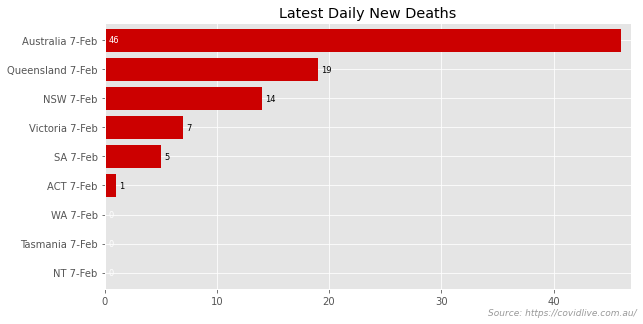

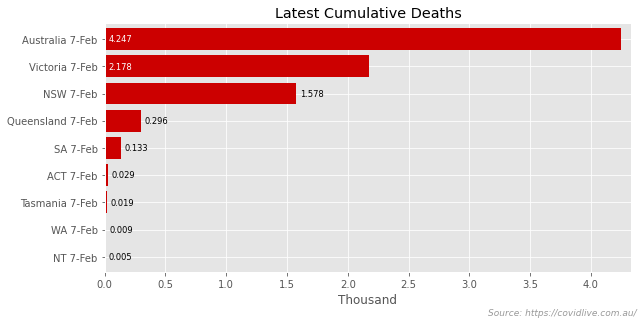

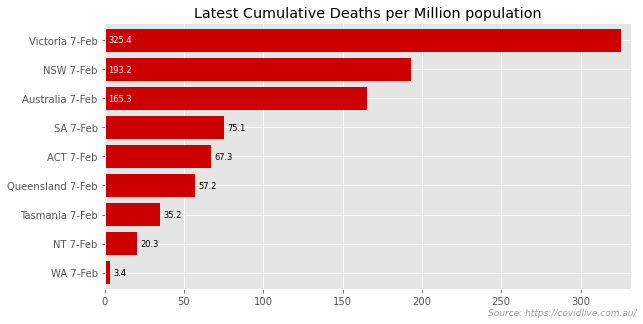

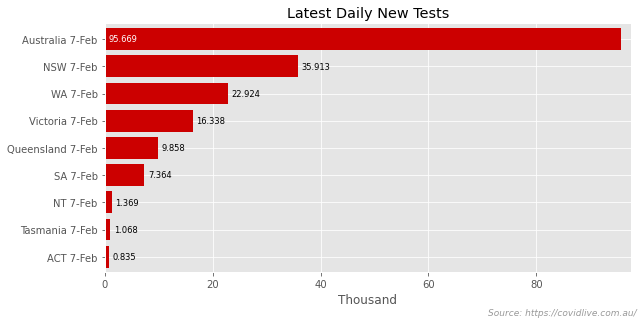

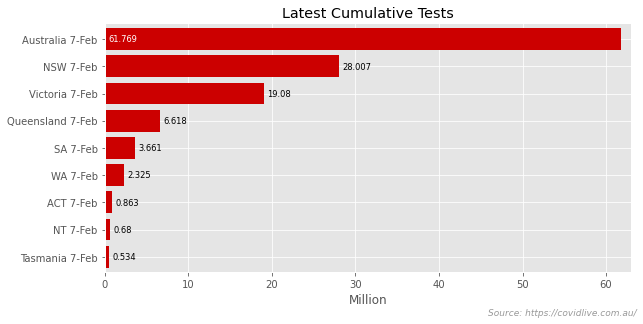

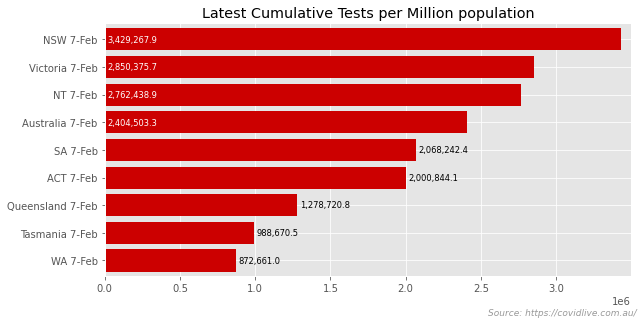

In [26]:
arguments = {
    'color': '#cc0000', 
    **std_plot_settings
}

for item, desc in selected_cols.items():
    ps.plot_final_barh(daily_u[item], title=f'Latest Daily New {desc.title()}', 
                    force_int=True, scale_x=True, **arguments)
    ps.plot_final_barh(cum_u[item], title=f'Latest Cumulative {desc.title()}', 
                    force_int=True, scale_x=True, round=3, **arguments)

    # Per capit
    per_capita = cum_u[item] / state_pop 
    ps.plot_final_barh(per_capita, 
                    title=f'Latest Cumulative {desc.title()} per Million population', 
                    round=1, 
                   **arguments)
    

## Line plots - cases, deaths and tests

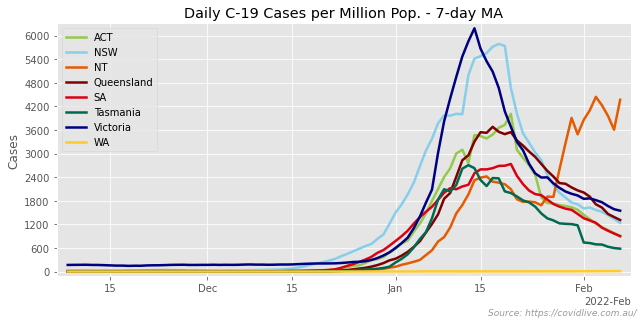

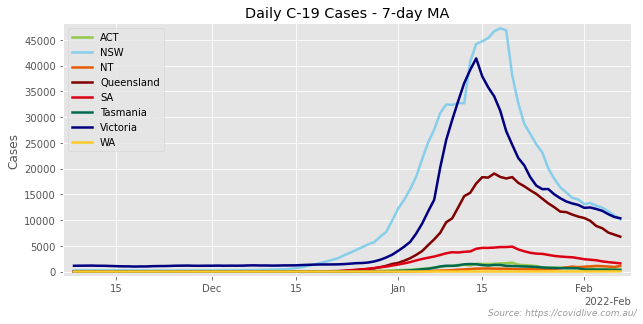

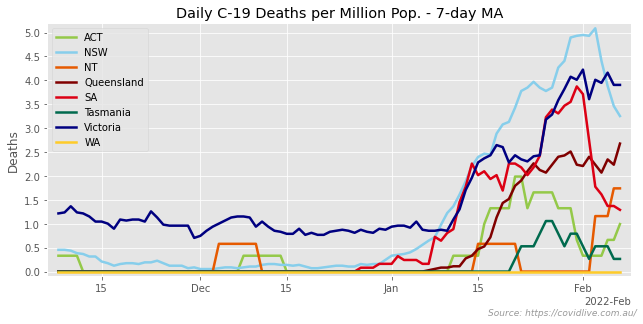

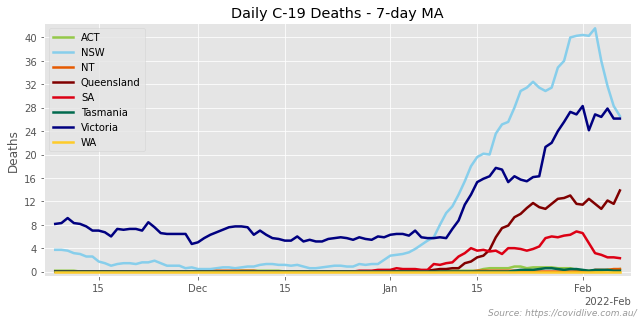

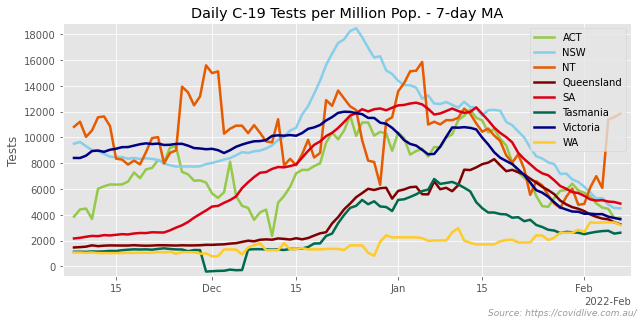

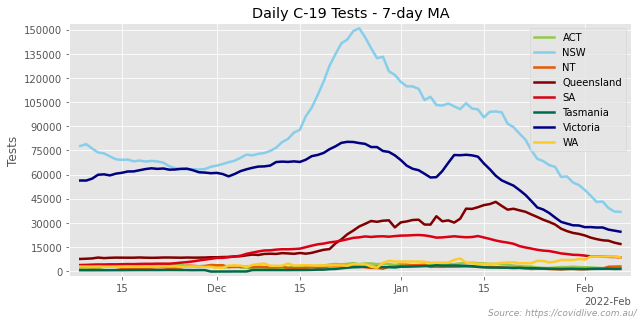

In [27]:
arguments = {
    'color_dict': state_palette,
    'recent': RECENT,
    'lw': 2.5,
    **std_plot_settings,
}

for item, desc in selected_cols.items():
    N = 7
    data = daily_u[item].rolling(N, min_periods=N).mean()

    pcdata = data / state_pop
    if 'Australia' in pcdata.columns: del pcdata['Australia']
    ps.plot_multiline(pcdata, 
                   title=f"Daily C-19 {desc.title()} per Million Pop. - {N}-day MA",
                   ylabel=desc.title(),
                   **arguments
                  )

    if 'Australia' in data.columns: del data['Australia']
    ps.plot_multiline(data, 
                   title=f"Daily C-19 {desc.title()} - {N}-day MA",
                   ylabel=desc.title(),
                   **arguments
                  )

## Active Cases

In [28]:
# capture active items, with nans where data is not up to date
item = "ACTIVE_CNT"
active_all = get_item(item, raw_json_data)
active_all.tail()

Lastest value less than its predecessor in ACTIVE_CNT for ACT, Australia, NSW, NT, Queensland, SA, Tasmania, Victoria


NAME            ACT  Australia       NSW      NT  Queensland       SA  \
REPORT_DATE                                                             
2022-02-03   3183.0   262328.0  110892.0  6913.0     55078.0  18308.0   
2022-02-04   2954.0   247878.0  102847.0  7094.0     50522.0  17199.0   
2022-02-05   2779.0   235271.0   94799.0  7360.0     49639.0  16041.0   
2022-02-06   2623.0   225729.0   89861.0  7372.0     48447.0  15215.0   
2022-02-07   2406.0   218733.0   85344.0  7370.0     47876.0  14635.0   

NAME         Tasmania  Victoria     WA  
REPORT_DATE                             
2022-02-03     1114.0   66648.0  192.0  
2022-02-04     1091.0   65968.0  203.0  
2022-02-05     1035.0   63409.0  209.0  
2022-02-06     1048.0   60917.0  246.0  
2022-02-07     1036.0   59801.0  265.0

### Bar chart of active cases

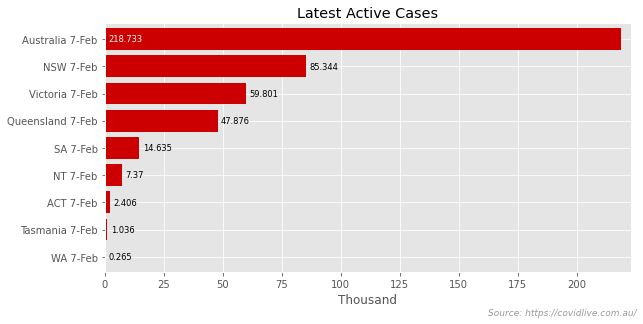

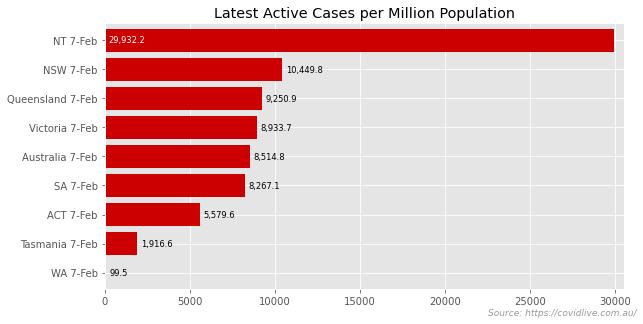

In [29]:
arguments = {
    'color': '#cc0000',
    **std_plot_settings,
}

ps.plot_final_barh(active_all, title=f'Latest Active Cases', 
                force_int=True, scale_x=True,
                **arguments,
               )

ps.plot_final_barh(active_all / state_pop, 
                title=f'Latest Active Cases per Million Population',
                round=1,
                **arguments,)

### Active cases - line plots

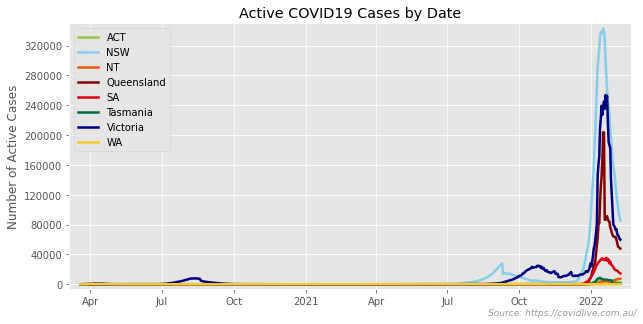

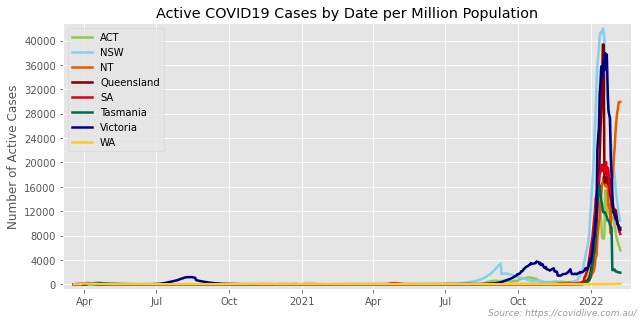

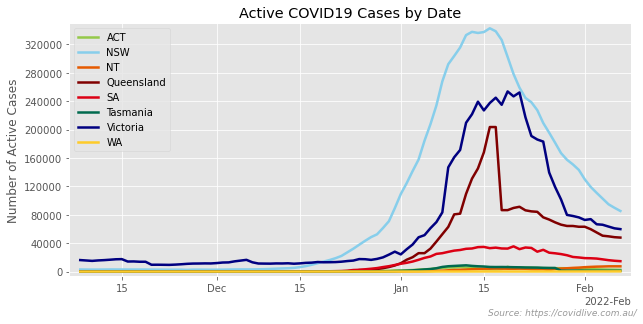

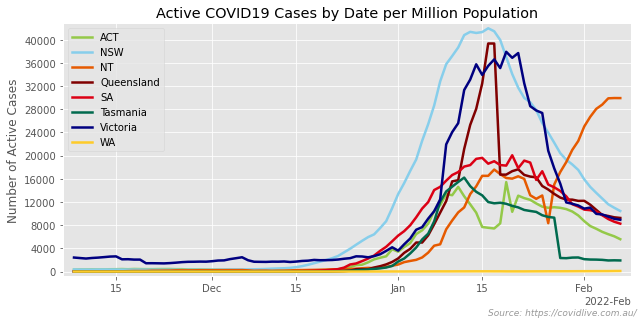

In [30]:
# line plots of trajectories

for recent in 0, RECENT:
    data = active_all.copy()
    title = "Active COVID19 Cases by Date"

    for suffix in '', ' per Million Population':
        if "Australia" in data.columns:
            del data["Australia"]
        title += suffix
        kwargs = {
            'title': title,
            'color_dict': state_palette,
            'ylabel': "Number of Active Cases",
            'save_tag': str(recent),
            'recent': recent,
            'lw': 2.5,
            **std_plot_settings,
        }
        ps.plot_multiline(data, **kwargs)
        data = data / state_pop


## Explore cases to deaths

Currently cannot compare deaths to daily new cases as there is insufficient information to construct rolling death rates. Issues with different disease progression for the different strains.

## Vaccination plots

### Get data

In [31]:
def get_vaxx_data():

    vaxx_items = [
        #"VACC_DOSE_CNT",
        "VACC_PEOPLE_CNT",
        #"VACC_AGED_CARE_CNT",
        #"VACC_GP_CNT",
        #"VACC_FIRST_DOSE_CNT",
        'VACC_BOOSTER_CNT',
    ]
    vaxx_data = {}
    for item in vaxx_items:
        vaxx_data[item] = (
            get_item(item, raw_json_data)
            .pipe(lambda x: x.where(x.diff() != 0, other=np.nan))
            .interpolate(limit_area="inside")
        )
    return vaxx_data

vaxx_data = get_vaxx_data()

### Bar plots

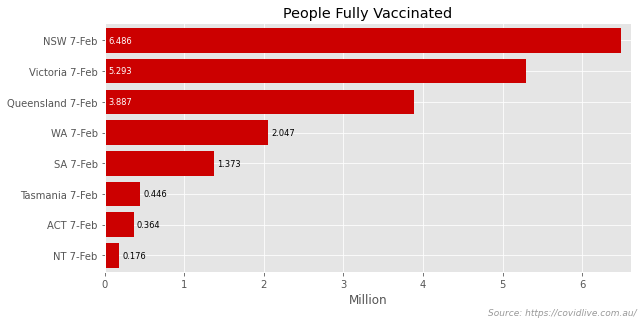

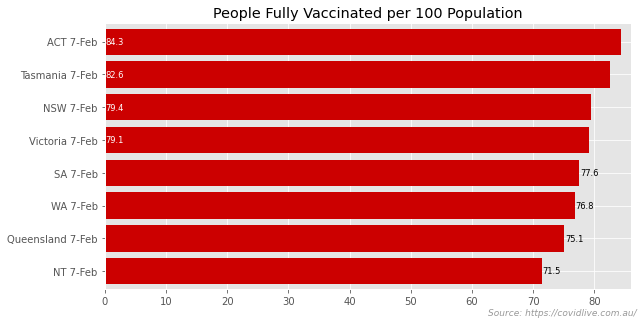

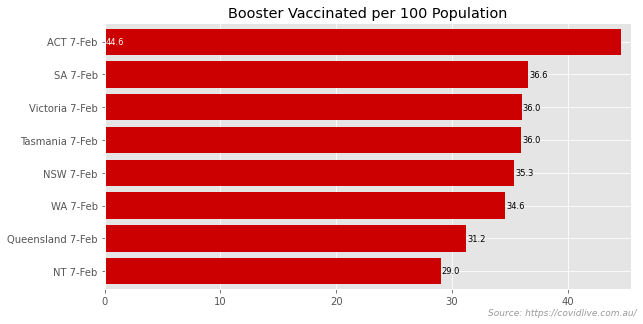

In [32]:
people = vaxx_data['VACC_PEOPLE_CNT'].copy()
people = people.drop('Australia', axis=1)

ps.plot_final_barh(people, color='#cc0000', 
                   title='People Fully Vaccinated', no_locator=True,
                   force_int=True, scale_x=True, round=3, **std_plot_settings)

per_capita = people / (state_pop * 10_000)
per_capita = per_capita.drop('Australia', axis=1)
ps.plot_final_barh(per_capita, color='#cc0000', 
                   title='People Fully Vaccinated per 100 Population',
                   no_locator=True, round=1, **std_plot_settings)

boosted = vaxx_data['VACC_BOOSTER_CNT'].copy()
boosted_pc = boosted / (state_pop * 10_000)
boosted_pc = boosted_pc.drop('Australia', axis=1)
ps.plot_final_barh(boosted_pc, color='#cc0000', 
                   title='Booster Vaccinated per 100 Population', 
                   no_locator=True, round=1, **std_plot_settings)


### Timeline plots

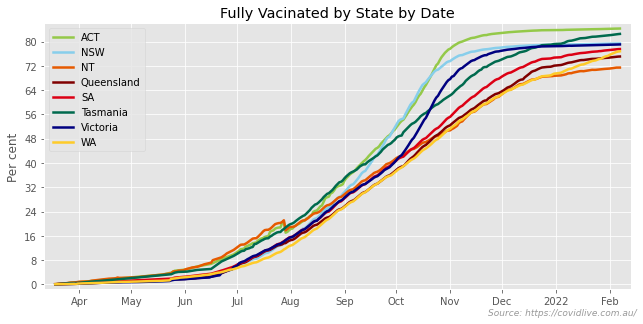

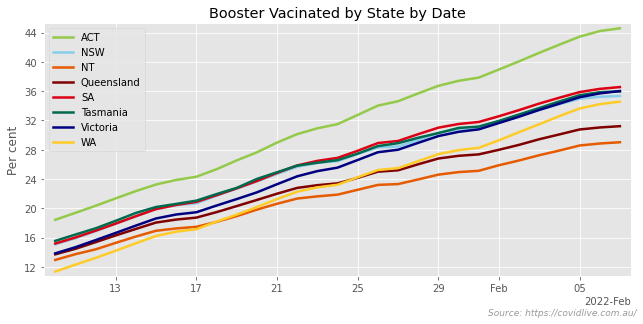

In [33]:
arguments = {
    'color_dict': state_palette,
    'lw': 2.5,
    **std_plot_settings,
}

ps.plot_multiline(per_capita, 
                   title=f"Fully Vacinated by State by Date",
                   ylabel='Per cent',
                   **arguments
                  )

ps.plot_multiline(boosted_pc, 
                   title=f"Booster Vacinated by State by Date",
                   ylabel='Per cent',
                   **arguments
                  )

## Hospitalised

### Get the hospital data

In [34]:
# get data
idents = ["MED_HOSP_CNT", "MED_ICU_CNT", "MED_VENT_CNT"]
descs = ["Hospitalised", "ICU", "Ventilator"]
hospital = {}
for ident, desc in zip(idents, descs):
    data = get_pivot_table(raw_json_data, ident)
    data.index = pd.DatetimeIndex(data.index)
    data = data.dropna(axis=0, how="all")
    hospital[ident] = data

Lastest value less than its predecessor in MED_HOSP_CNT for ACT, Australia, NSW, Queensland, Victoria
Lastest value less than its predecessor in MED_ICU_CNT for Australia, NSW, Queensland, Victoria
Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW, Victoria


In [35]:
# let's look at the in-hospital numbers for the past week
hospital["MED_HOSP_CNT"].tail(7)

NAME          ACT  Australia     NSW     NT  Queensland     SA  Tasmania  \
REPORT_DATE                                                                
2022-02-01   64.0     4954.0  2749.0  132.0       868.0  273.0      16.0   
2022-02-02   61.0     4665.0  2623.0  129.0       837.0  233.0      13.0   
2022-02-03   63.0     4594.0  2578.0  141.0       820.0  226.0      13.0   
2022-02-04   65.0     4448.0  2494.0  148.0       798.0  223.0      13.0   
2022-02-05   63.0     4256.0  2337.0  151.0       790.0  218.0      10.0   
2022-02-06   60.0     4147.0  2321.0  158.0       726.0  218.0      11.0   
2022-02-07   57.0     3916.0  2099.0  158.0       724.0  224.0      15.0   

NAME         Victoria   WA  
REPORT_DATE                 
2022-02-01      851.0  1.0  
2022-02-02      768.0  1.0  
2022-02-03      752.0  1.0  
2022-02-04      707.0  0.0  
2022-02-05      687.0  0.0  
2022-02-06      652.0  1.0  
2022-02-07      638.0  1.0

In [36]:
# let's look at the day-on-day changes for the past week
hospital["MED_HOSP_CNT"].diff().tail(7)

NAME         ACT  Australia    NSW    NT  Queensland    SA  Tasmania  \
REPORT_DATE                                                            
2022-02-01   2.0        7.0  -30.0  18.0        47.0  -8.0       0.0   
2022-02-02  -3.0     -289.0 -126.0  -3.0       -31.0 -40.0      -3.0   
2022-02-03   2.0      -71.0  -45.0  12.0       -17.0  -7.0       0.0   
2022-02-04   2.0     -146.0  -84.0   7.0       -22.0  -3.0       0.0   
2022-02-05  -2.0     -192.0 -157.0   3.0        -8.0  -5.0      -3.0   
2022-02-06  -3.0     -109.0  -16.0   7.0       -64.0   0.0       1.0   
2022-02-07  -3.0     -231.0 -222.0   0.0        -2.0   6.0       4.0   

NAME         Victoria   WA  
REPORT_DATE                 
2022-02-01      -22.0  0.0  
2022-02-02      -83.0  0.0  
2022-02-03      -16.0  0.0  
2022-02-04      -45.0 -1.0  
2022-02-05      -20.0  0.0  
2022-02-06      -35.0  1.0  
2022-02-07      -14.0  0.0

### Recent hospital counts daily

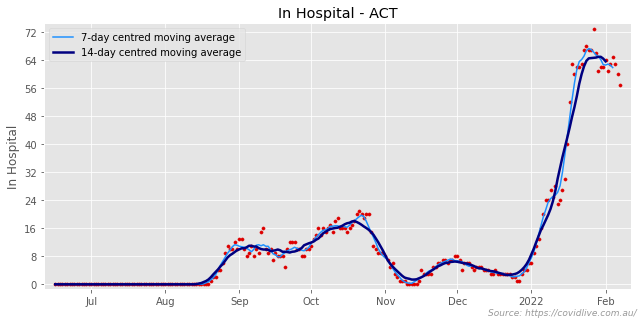

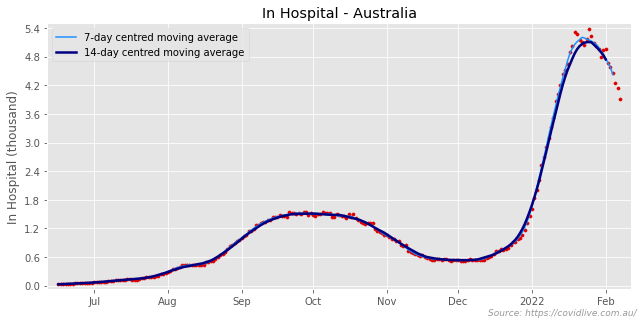

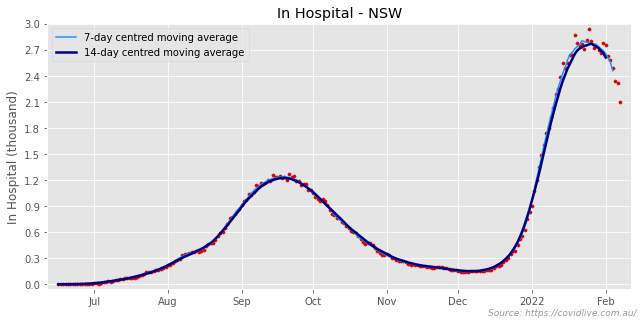

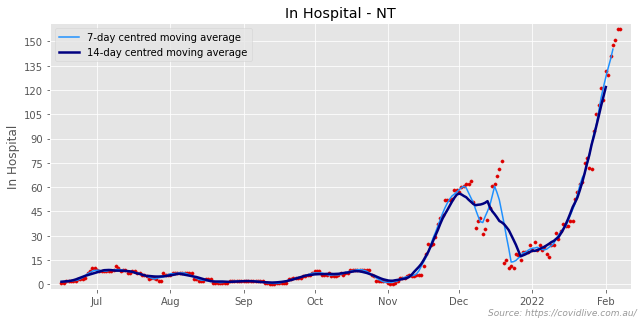

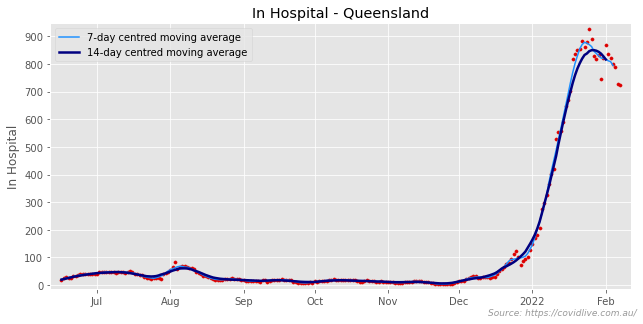

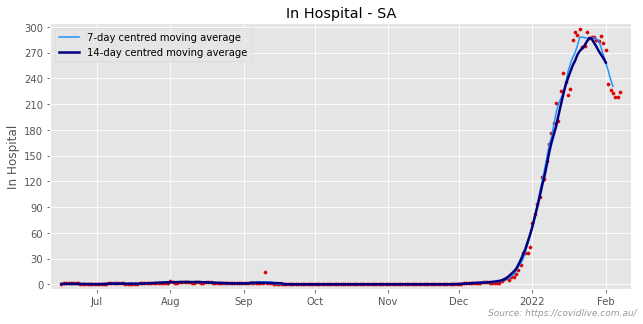

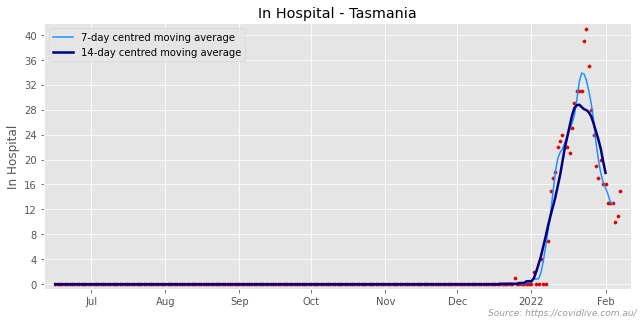

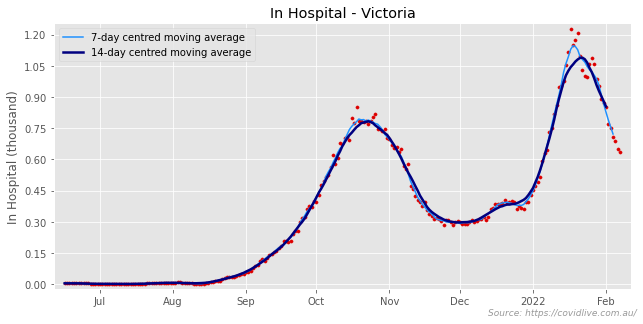

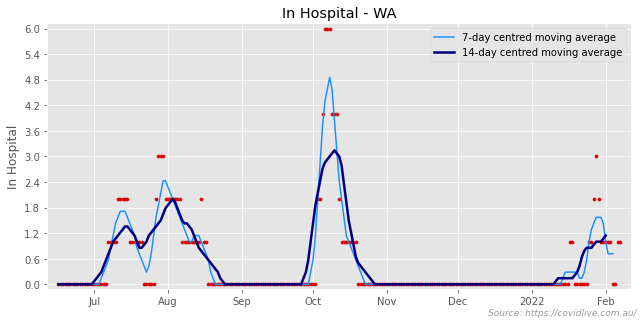

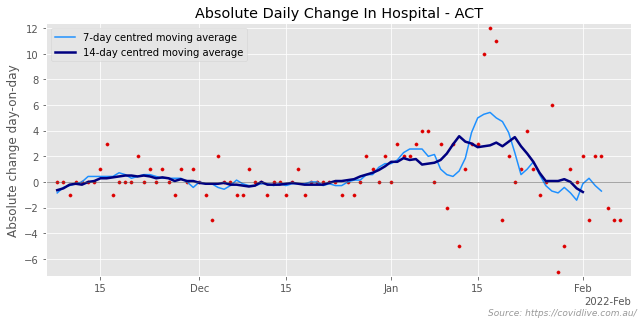

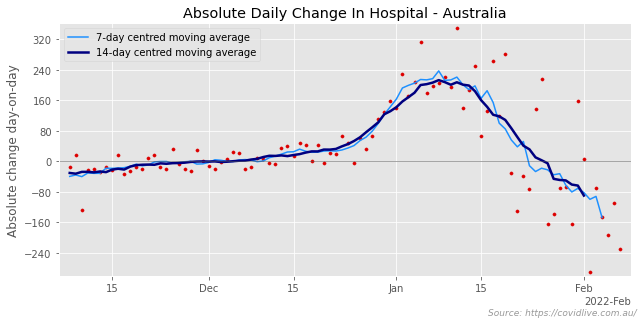

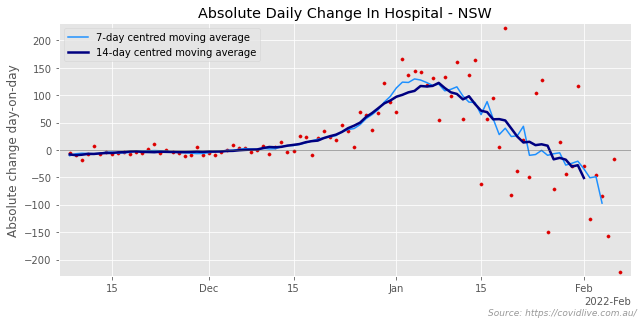

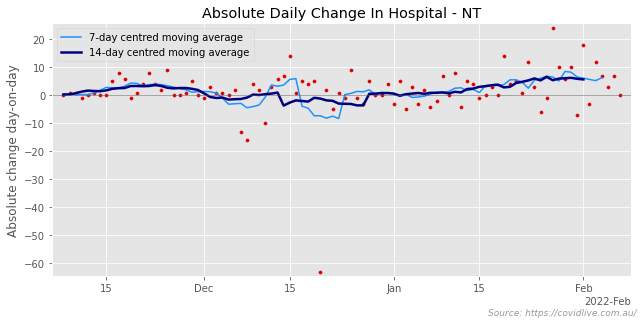

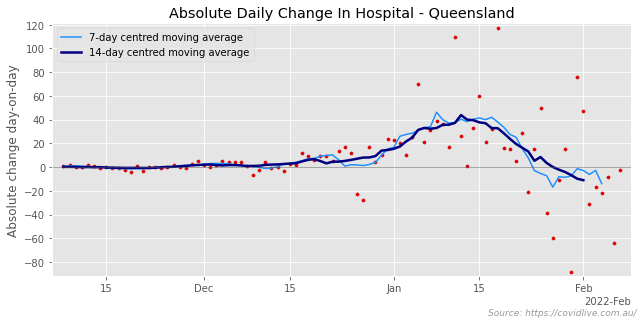

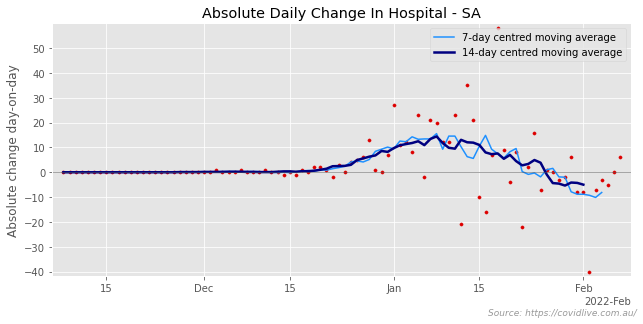

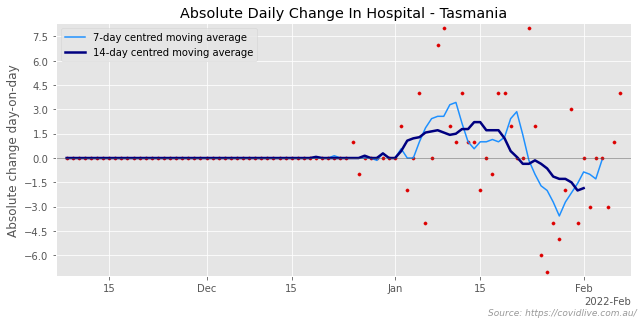

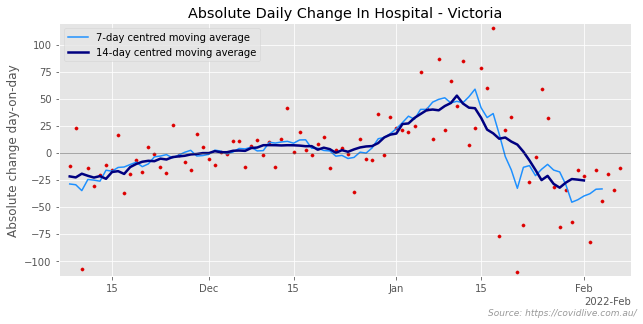

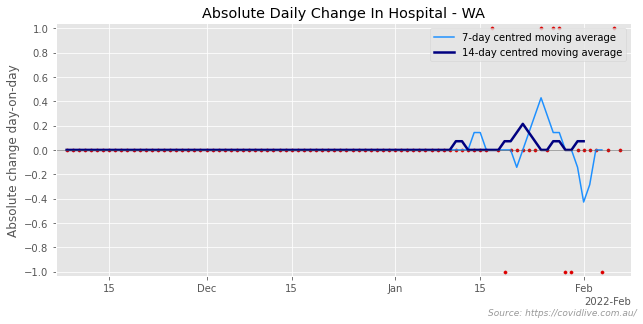

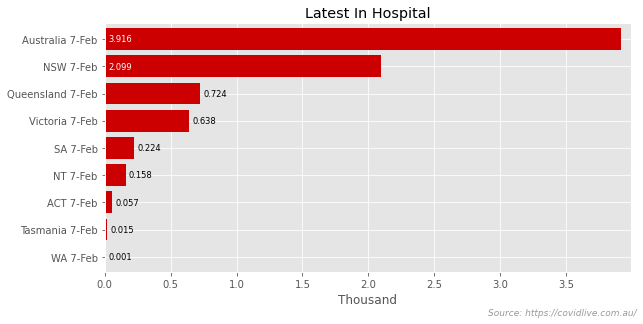

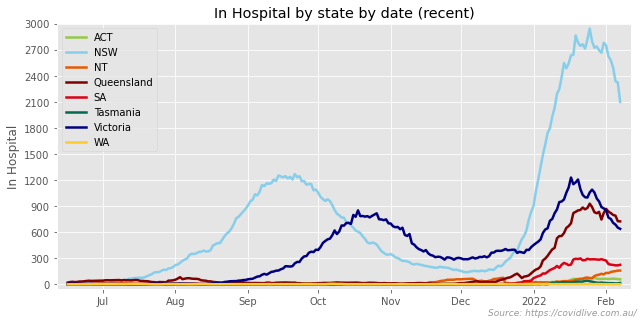

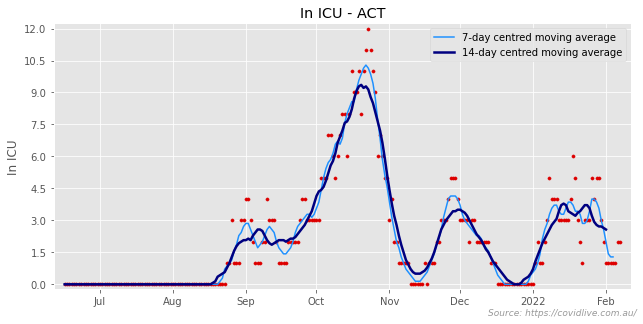

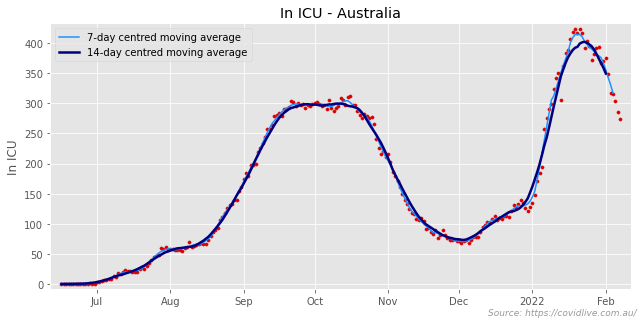

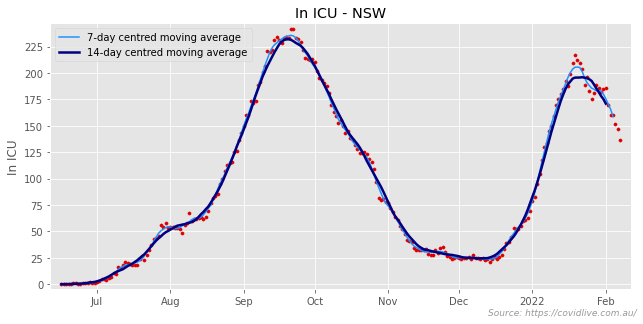

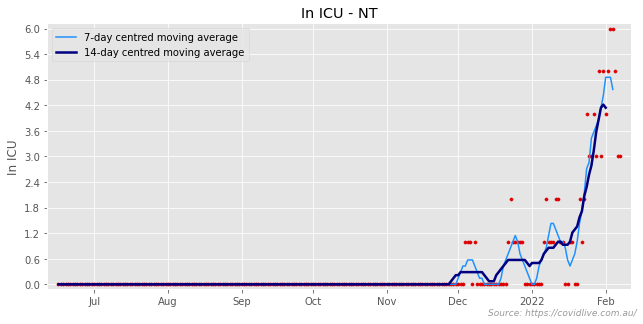

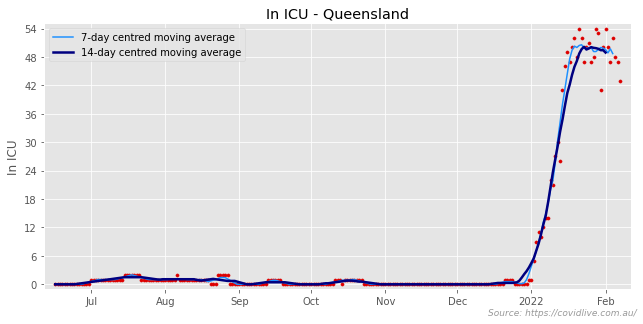

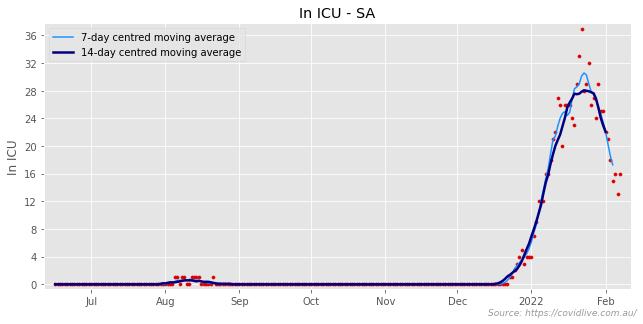

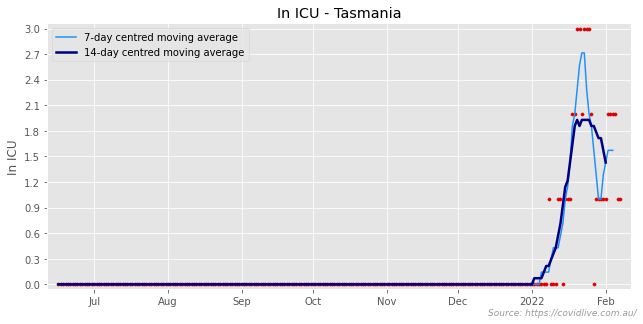

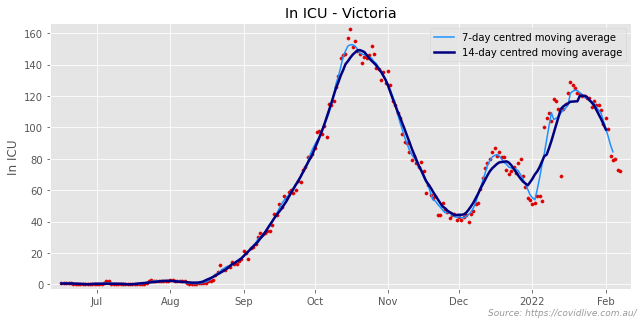

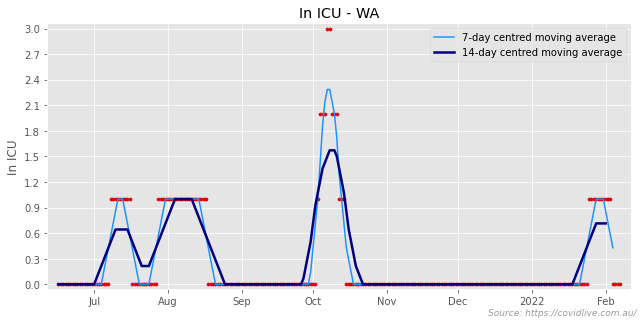

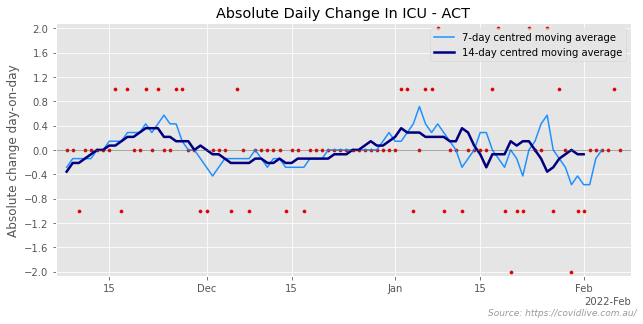

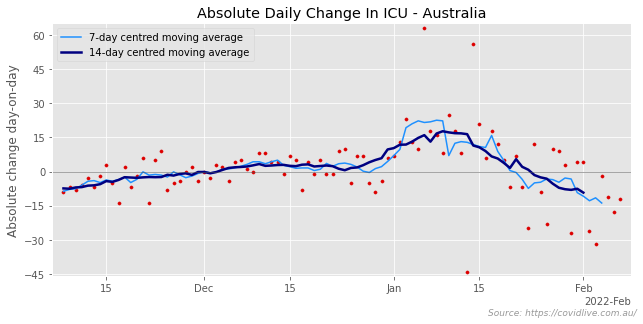

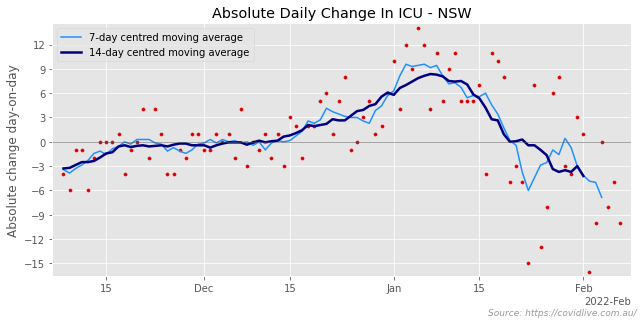

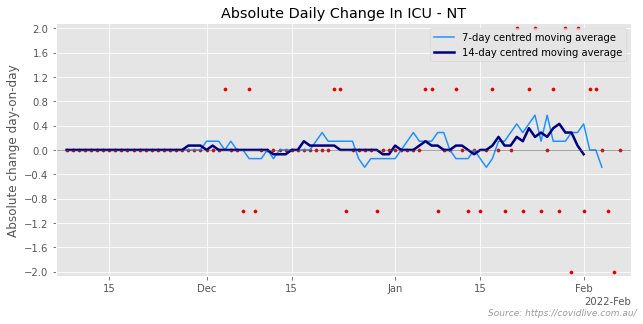

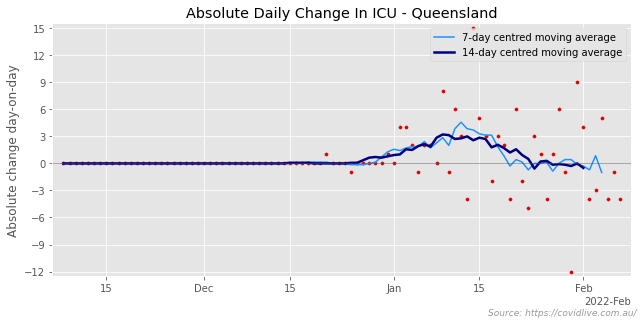

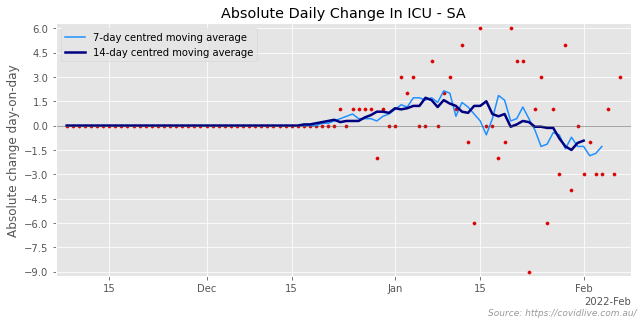

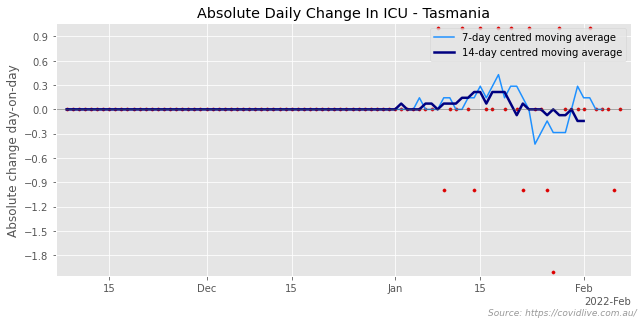

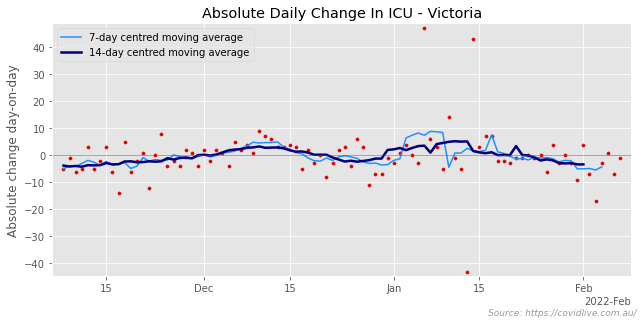

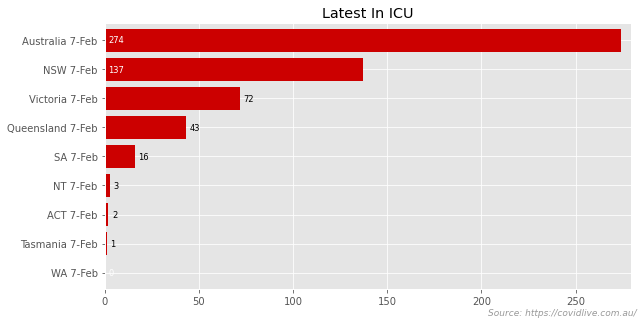

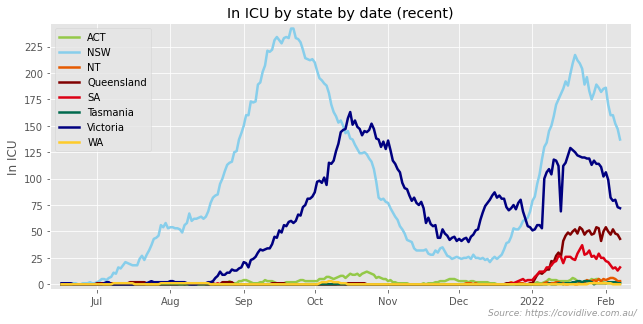

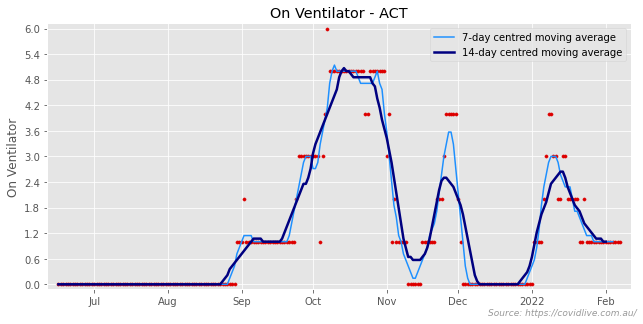

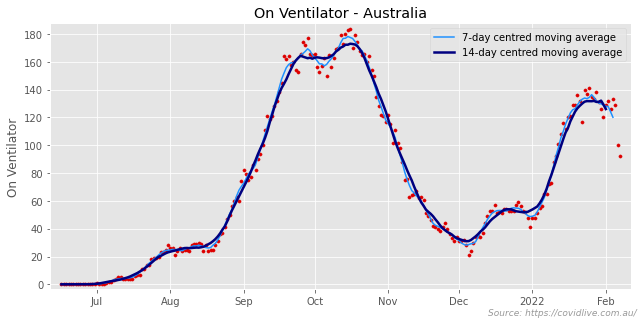

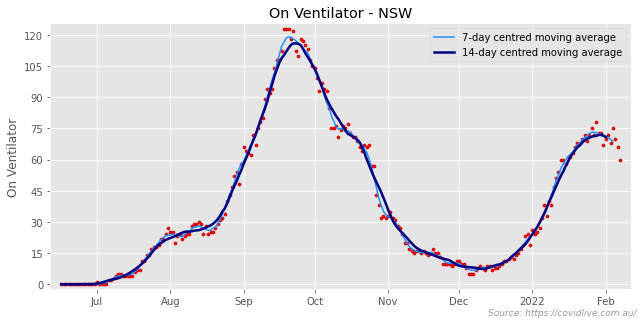

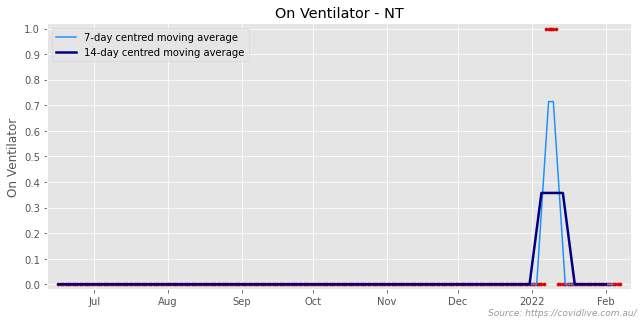

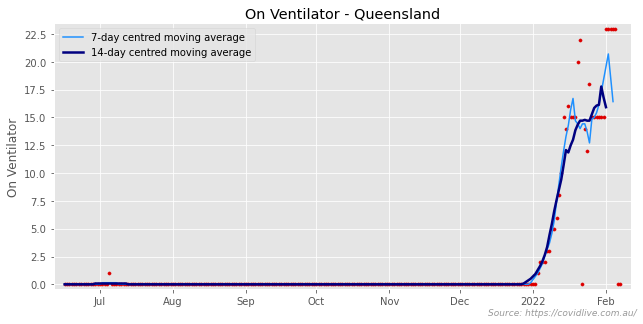

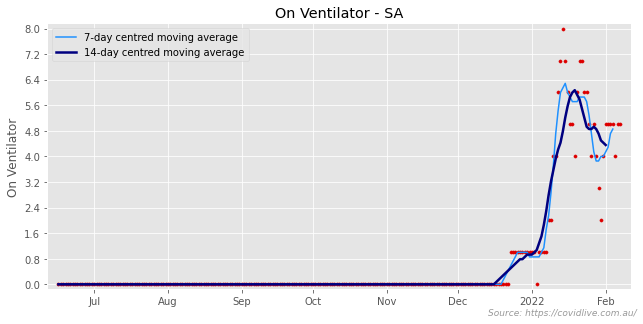

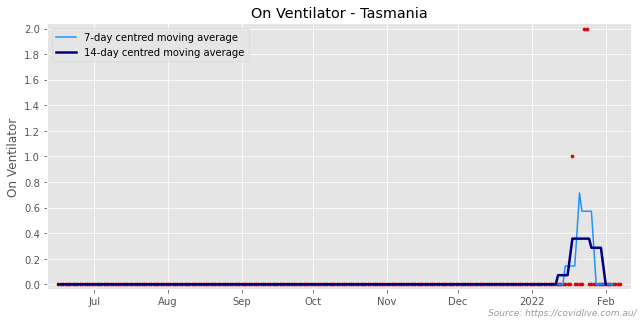

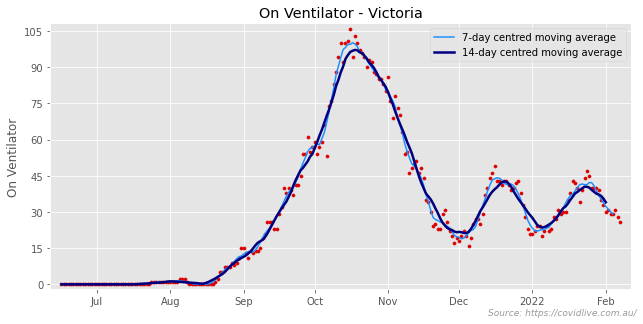

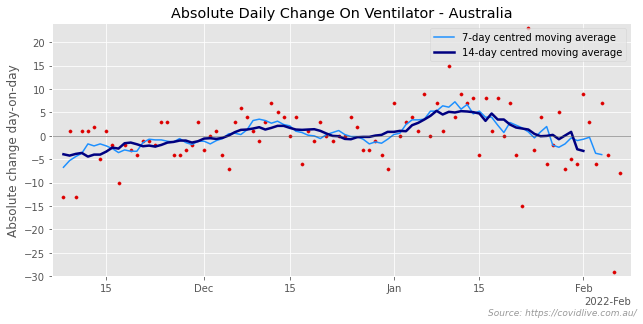

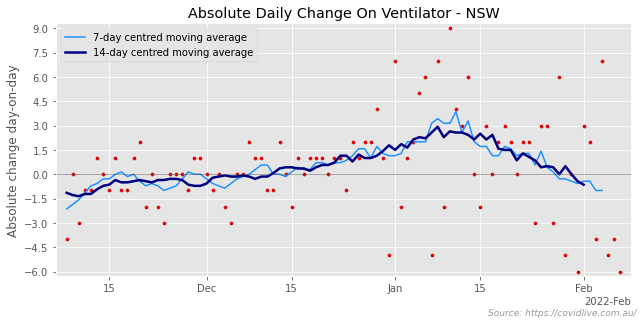

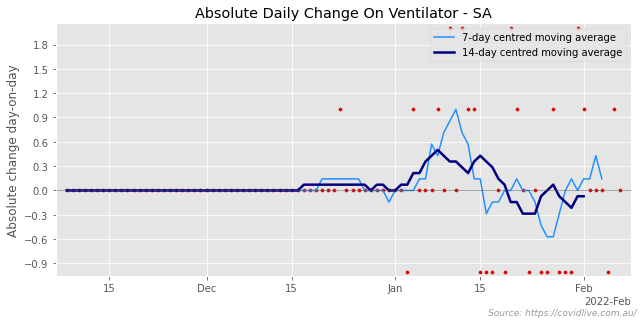

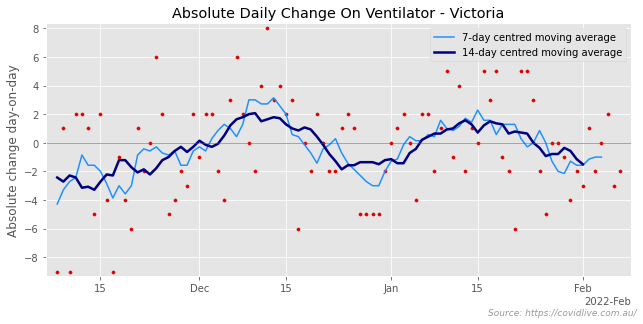

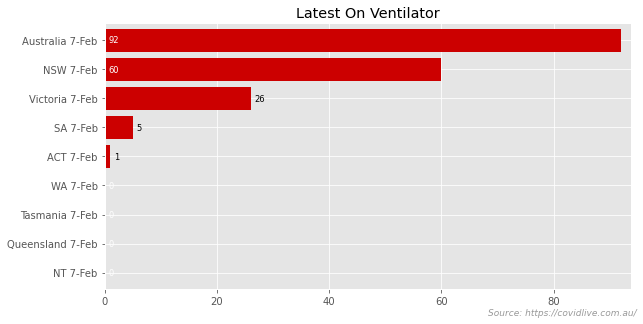

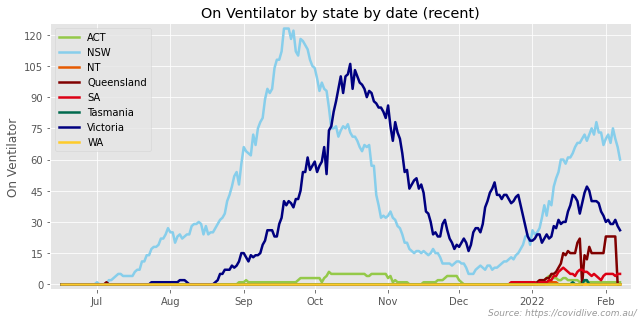

In [37]:

recent_arguments = {
    **std_plot_settings,
    'recent': DELTA_RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': ps.plot_series_with_ma,
}

diffed_arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': ps.plot_series_with_ma,
    'ylabel': 'Absolute change day-on-day',
    'axhline': 'y=0,lw=0.5,color=#555555',
}

line_arguments = {
    'color_dict': state_palette,
    'recent': DELTA_RECENT,
    'lw': 2.5,
    **std_plot_settings,
}

hospital_frame = {
    # item, plain-English
    'MED_HOSP_CNT': 'In Hospital',
    'MED_ICU_CNT': 'In ICU',
    'MED_VENT_CNT': 'On Ventilator',
}

for item, desc in hospital_frame.items():
    df = hospital[item]
    ps.loop_over_frame(df, desc, **recent_arguments)
    ps.loop_over_frame(df.diff(), 
                       f'Absolute Daily Change {desc}', 
                       **diffed_arguments)
    ps.plot_final_barh(df, title=f'Latest {desc}', 
                no_locator=True, force_int=True, scale_x=True,
                    color='#cc0000', **std_plot_settings) 
    ps.plot_multiline(df.loc[:, df.columns != 'Australia'], 
                   title=f"{desc} by state by date (recent)",
                   ylabel=desc,
                   **line_arguments
                  )

### Progression

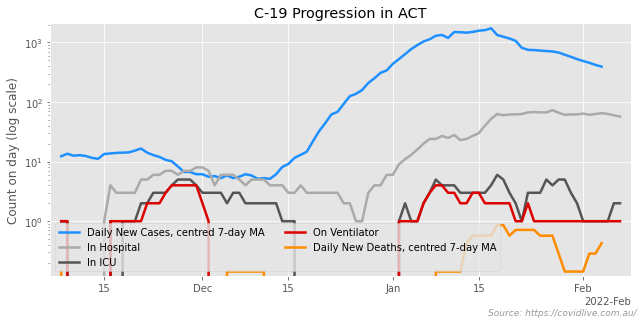

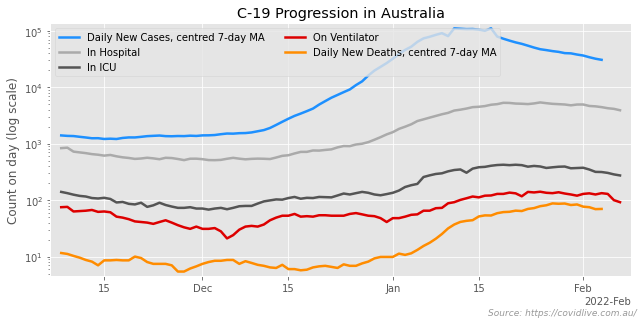

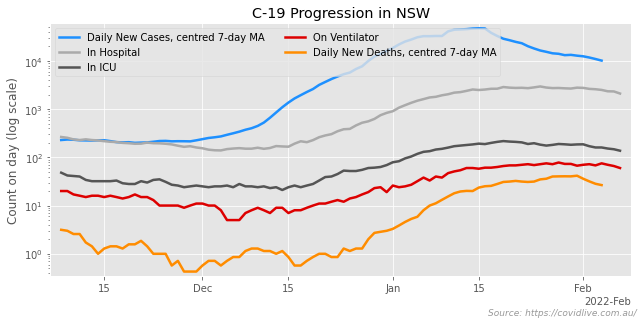

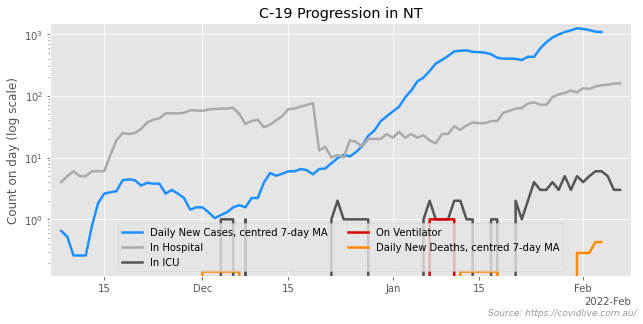

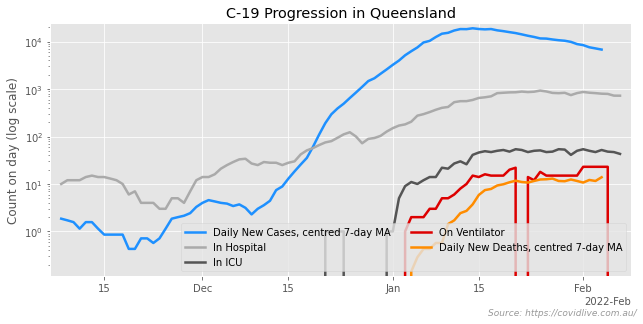

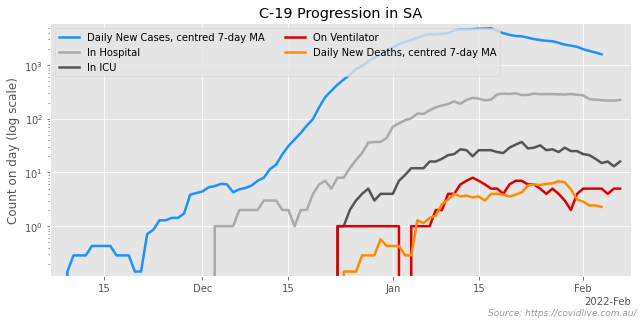

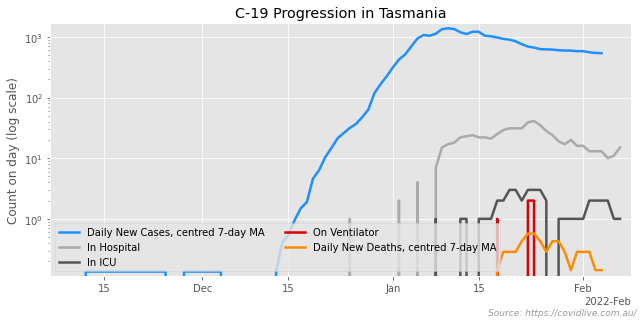

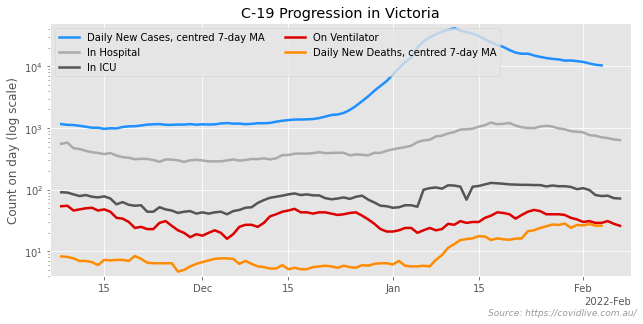

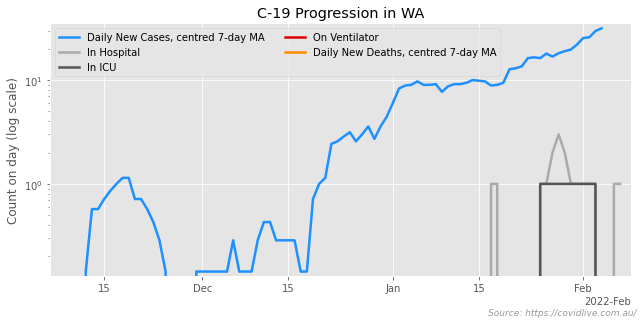

In [38]:
N_CASES_ROLL = 7
M_DEATHS_ROLL = 7
cases = daily_c['CASE_CNT'].rolling(N_CASES_ROLL, center=True).mean()
deaths = daily_c['DEATH_CNT'].rolling(M_DEATHS_ROLL, center=True).mean()
hospital_ = hospital['MED_HOSP_CNT']
icu = hospital['MED_ICU_CNT']
vent = hospital['MED_VENT_CNT']

progress_frame = [
    (cases, f'Daily New Cases, centred {N_CASES_ROLL}-day MA'),
    (hospital_, 'In Hospital'),
    (icu, 'In ICU'),
    (vent, 'On Ventilator'),
    (deaths, f'Daily New Deaths, centred {M_DEATHS_ROLL}-day MA'),
]

colors = ["dodgerblue", "#aaaaaa", "#555555", "#dd0000", "darkorange"]
cdict = {v: colors[i] for i, (_, v) in enumerate(progress_frame)}
line_arguments = {
    'color_dict': cdict,
    'recent': RECENT,
    'lw': 2.5,
    'yscale': 'log',
    'legend_ncol': 2,
    **std_plot_settings,
}


for state in cases.columns:
    combined = {}
    for (data, label) in progress_frame:
        combined[label] = data[state]
    df = pd.DataFrame(combined)
    ps.plot_multiline(df, 
                   title=f"C-19 Progression in {state}",
                   ylabel='Count on day (log scale)',
                   **line_arguments
                  )
    

## Source of infection

### Extraction

In [39]:
Australia = "Australia"
soi_names = {
    "SRC_OVERSEAS_CNT": "Overseas",
    "SRC_INTERSTATE_CNT": "Interstate",
    "SRC_CONTACT_CNT": "Known contact",
    "SRC_UNKNOWN_CNT": "Unknown contact",
    "SRC_INVES_CNT": "Investigating",
}
# check we have all possible sources ...
assert (raw_json_data.columns.str[:3] == "SRC").sum() == len(soi_names)

In [40]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in soi_names.keys():
        table = get_item(item, raw_json_data)
        if Australia in table.columns:
            del table[Australia]
        soi_tables[soi_names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia:
            continue
        table = pd.DataFrame()
        for item in soi_names.keys():
            table[soi_names[item]] = soi_tables[soi_names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national)
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [41]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

### Check latest raw SOI data against raw case count data

In [42]:
# WARN if penultimate and final SOI
# totals do not match CASE_CNT table


def check_SOI():
    FINALITY = 3

    soi_cases = {name: x.sum(axis=1) for name, x in state_soi_tables.items()}
    soi_cases = pd.DataFrame(soi_cases)
    cases = cum_u["CASE_CNT"][soi_cases.columns]  # ensure column order

    for check in (-1, -2):
        case_row = cases.diff().iloc[check]
        soi_row = soi_cases.diff().iloc[check]
        problematic = (case_row != soi_row) & soi_row.notna() & case_row.notna()
        if problematic.any():
            warn(
                f'CASE_CNT mismatch - check the {"second " if check == -2 else ""}'
                "last line of the SOI tables for "
                f"{problematic[problematic].index.values}"
            )

            print("Latest cases data:")
            display(cases.diff().tail(FINALITY))
            print("Latest source of infection data:")
            display(soi_cases.diff().tail(FINALITY))

            print("=" * 50)
            problematic = problematic[problematic]
            for i, p in problematic.iteritems():
                print(i)
                display(state_soi_tables[i].tail(FINALITY))
                print("-" * 50)


check_SOI()

CASE_CNT mismatch - check the last line of the SOI tables for ['Victoria' 'Queensland' 'SA' 'Tasmania' 'NT']
Latest cases data:


NAME            NSW  Victoria  Queensland      SA    WA  Tasmania      NT  \
REPORT_DATE                                                                 
2022-02-05   8322.0    7810.0      8478.0  1289.0  26.0     471.0  1123.0   
2022-02-06   7804.0    7169.0      5737.0  1234.0  46.0     471.0   867.0   
2022-02-07   7288.0    8275.0      4701.0  1147.0  36.0     443.0   831.0   

NAME           ACT  
REPORT_DATE         
2022-02-05   352.0  
2022-02-06   309.0  
2022-02-07   266.0

Latest source of infection data:


NSW  Victoria  Queensland      SA    WA  Tasmania      NT  \
REPORT_DATE                                                                 
2022-02-05   8322.0    7506.0      5748.0  1394.0  26.0     139.0  1123.0   
2022-02-06   7804.0    6919.0      3606.0  1302.0  46.0     187.0   932.0   
2022-02-07   7288.0    8095.0      2330.0  1343.0  36.0     124.0   794.0   

               ACT  
REPORT_DATE         
2022-02-05   352.0  
2022-02-06   309.0  
2022-02-07   266.0

Victoria


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05     1606.0         0.0       199041.0           5395.0   
2022-02-06     1606.0         0.0       199974.0           5399.0   
2022-02-07     1606.0         0.0       200826.0           5401.0   

             Investigating  
REPORT_DATE                 
2022-02-05        671880.0  
2022-02-06        677862.0  
2022-02-07        685103.0

--------------------------------------------------
Queensland


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05     1606.0       472.0         6059.0           4532.0   
2022-02-06     1607.0       475.0         6268.0           4630.0   
2022-02-07     1607.0       475.0         6422.0           4725.0   

             Investigating  
REPORT_DATE                 
2022-02-05        315109.0  
2022-02-06        318404.0  
2022-02-07        320485.0

--------------------------------------------------
SA


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05     1216.0      4140.0        37082.0          30229.0   
2022-02-06     1221.0      4163.0        37524.0          30644.0   
2022-02-07     1234.0      4181.0        37936.0          31019.0   

             Investigating  
REPORT_DATE                 
2022-02-05         40107.0  
2022-02-06         40524.0  
2022-02-07         41049.0

--------------------------------------------------
Tasmania


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05      147.0      1294.0         3378.0           6031.0   
2022-02-06      147.0      1295.0         3390.0           6035.0   
2022-02-07      147.0      1296.0         3396.0           6035.0   

             Investigating  
REPORT_DATE                 
2022-02-05          4048.0  
2022-02-06          4218.0  
2022-02-07          4335.0

--------------------------------------------------
NT


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05      287.0      1887.0         3522.0           3332.0   
2022-02-06      287.0      1890.0         3538.0           3386.0   
2022-02-07      287.0      1892.0         3580.0           3417.0   

             Investigating  
REPORT_DATE                 
2022-02-05         12532.0  
2022-02-06         13391.0  
2022-02-07         14110.0

--------------------------------------------------
CASE_CNT mismatch - check the second last line of the SOI tables for ['Victoria' 'Queensland' 'SA' 'Tasmania' 'NT']
Latest cases data:


NAME            NSW  Victoria  Queensland      SA    WA  Tasmania      NT  \
REPORT_DATE                                                                 
2022-02-05   8322.0    7810.0      8478.0  1289.0  26.0     471.0  1123.0   
2022-02-06   7804.0    7169.0      5737.0  1234.0  46.0     471.0   867.0   
2022-02-07   7288.0    8275.0      4701.0  1147.0  36.0     443.0   831.0   

NAME           ACT  
REPORT_DATE         
2022-02-05   352.0  
2022-02-06   309.0  
2022-02-07   266.0

Latest source of infection data:


NSW  Victoria  Queensland      SA    WA  Tasmania      NT  \
REPORT_DATE                                                                 
2022-02-05   8322.0    7506.0      5748.0  1394.0  26.0     139.0  1123.0   
2022-02-06   7804.0    6919.0      3606.0  1302.0  46.0     187.0   932.0   
2022-02-07   7288.0    8095.0      2330.0  1343.0  36.0     124.0   794.0   

               ACT  
REPORT_DATE         
2022-02-05   352.0  
2022-02-06   309.0  
2022-02-07   266.0

Victoria


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05     1606.0         0.0       199041.0           5395.0   
2022-02-06     1606.0         0.0       199974.0           5399.0   
2022-02-07     1606.0         0.0       200826.0           5401.0   

             Investigating  
REPORT_DATE                 
2022-02-05        671880.0  
2022-02-06        677862.0  
2022-02-07        685103.0

--------------------------------------------------
Queensland


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05     1606.0       472.0         6059.0           4532.0   
2022-02-06     1607.0       475.0         6268.0           4630.0   
2022-02-07     1607.0       475.0         6422.0           4725.0   

             Investigating  
REPORT_DATE                 
2022-02-05        315109.0  
2022-02-06        318404.0  
2022-02-07        320485.0

--------------------------------------------------
SA


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05     1216.0      4140.0        37082.0          30229.0   
2022-02-06     1221.0      4163.0        37524.0          30644.0   
2022-02-07     1234.0      4181.0        37936.0          31019.0   

             Investigating  
REPORT_DATE                 
2022-02-05         40107.0  
2022-02-06         40524.0  
2022-02-07         41049.0

--------------------------------------------------
Tasmania


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05      147.0      1294.0         3378.0           6031.0   
2022-02-06      147.0      1295.0         3390.0           6035.0   
2022-02-07      147.0      1296.0         3396.0           6035.0   

             Investigating  
REPORT_DATE                 
2022-02-05          4048.0  
2022-02-06          4218.0  
2022-02-07          4335.0

--------------------------------------------------
NT


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-02-05      287.0      1887.0         3522.0           3332.0   
2022-02-06      287.0      1890.0         3538.0           3386.0   
2022-02-07      287.0      1892.0         3580.0           3417.0   

             Investigating  
REPORT_DATE                 
2022-02-05         12532.0  
2022-02-06         13391.0  
2022-02-07         14110.0

--------------------------------------------------


### Plot overseas infections

It looks like this is not meaningfully collected in some jurisdictions in 2022

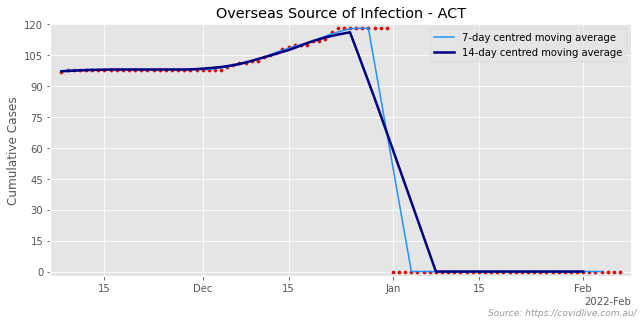

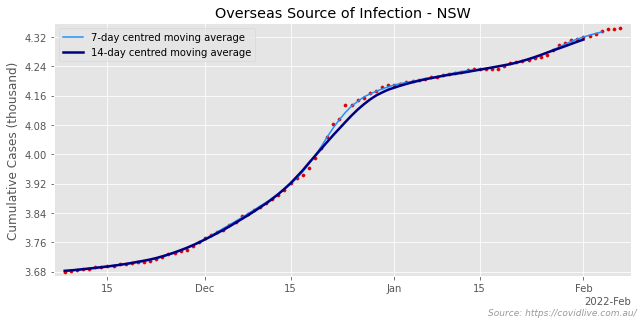

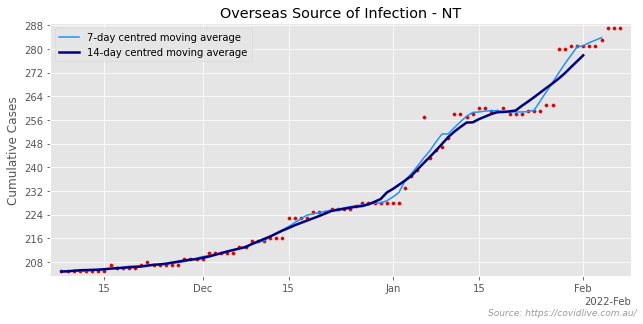

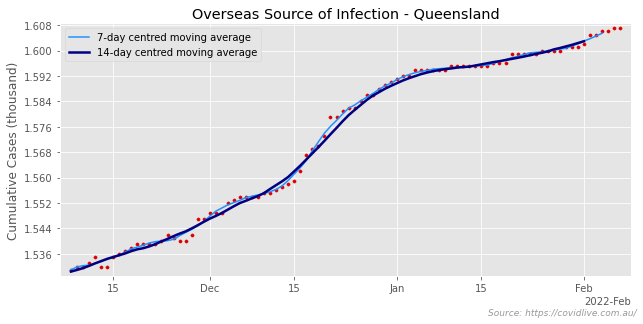

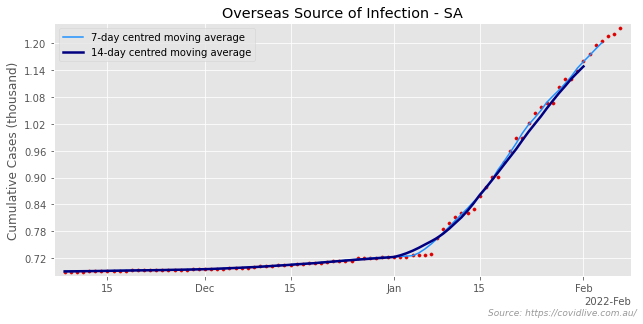

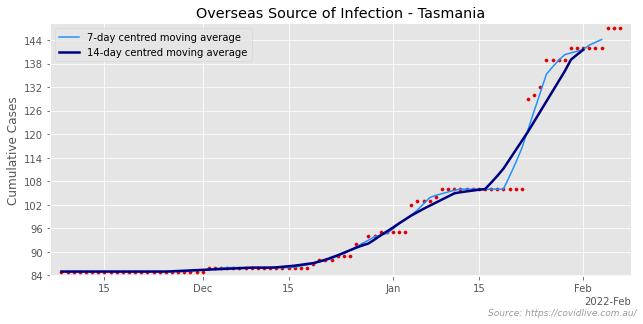

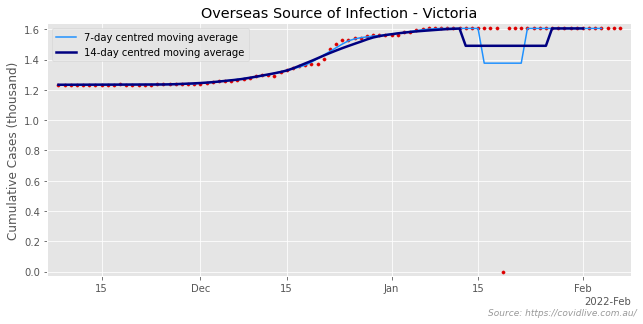

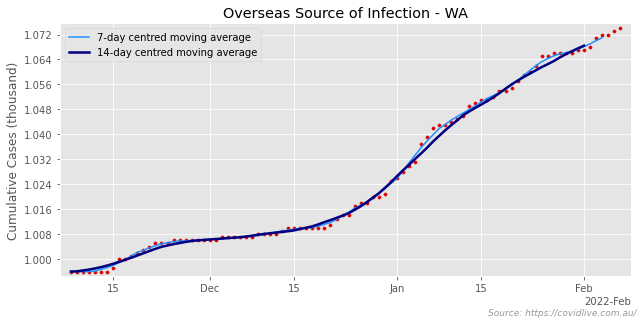

In [43]:
recent_arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': ps.plot_series_with_ma,
}

ps.loop_over_frame(soi_tables['Overseas'], 
                   'Overseas Source of Infection', 
                   ylabel='Cumulative Cases',
                   **recent_arguments)

## Local cases/transmission

### Create dataframe for local transmission

Note: the overseas source of infection data can be substantially delayed (up to 24 hours) on the total new cases in Australia (from all sources). Consequently, Australian transmission data can be delayed. 

Also, see below, I have reason to believe some jurisdictions no longer collect this data.

In [44]:
adj_overseas = soi_tables['Overseas'].replace(0, np.nan).ffill()
display(adj_overseas.tail())

raw_cum_au_trans = (
    (cum_u['CASE_CNT'] - adj_overseas)
    .drop('Australia', axis=1)
    .dropna(how='all', axis=0)
)
    
raw_cum_au_trans.tail()

NAME           ACT     NSW     NT  Queensland      SA  Tasmania  Victoria  \
REPORT_DATE                                                                 
2022-02-03   118.0  4329.0  281.0      1605.0  1196.0     142.0    1606.0   
2022-02-04   118.0  4336.0  283.0      1606.0  1206.0     142.0    1606.0   
2022-02-05   118.0  4341.0  287.0      1606.0  1216.0     147.0    1606.0   
2022-02-06   118.0  4342.0  287.0      1607.0  1221.0     147.0    1606.0   
2022-02-07   118.0  4344.0  287.0      1607.0  1234.0     147.0    1606.0   

NAME             WA  
REPORT_DATE          
2022-02-03   1071.0  
2022-02-04   1072.0  
2022-02-05   1072.0  
2022-02-06   1073.0  
2022-02-07   1074.0

NAME             ACT        NSW       NT  Queensland        SA  Tasmania  \
REPORT_DATE                                                                
2022-02-03   37244.0  1106146.0  18868.0    430254.0  124494.0   29610.0   
2022-02-04   37653.0  1116693.0  20154.0    437061.0  125726.0   30175.0   
2022-02-05   38005.0  1125010.0  21273.0    445539.0  127005.0   30641.0   
2022-02-06   38314.0  1132813.0  22140.0    451275.0  128234.0   31112.0   
2022-02-07   38580.0  1140099.0  22971.0    455976.0  129368.0   31555.0   

NAME         Victoria     WA  
REPORT_DATE                   
2022-02-03   888104.0  537.0  
2022-02-04   899344.0  568.0  
2022-02-05   907154.0  594.0  
2022-02-06   914323.0  639.0  
2022-02-07   922598.0  674.0

In [45]:
LOCAL = 'LOCAL'       
cum_u[LOCAL] = raw_cum_au_trans
daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

### And plot

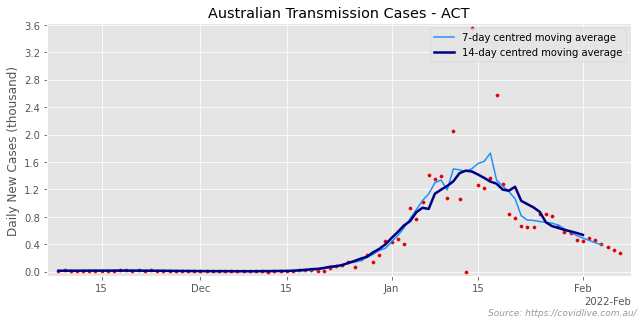

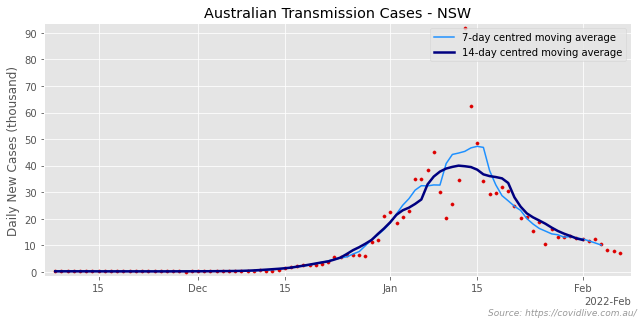

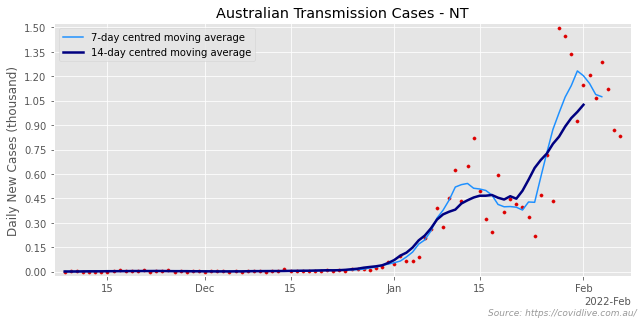

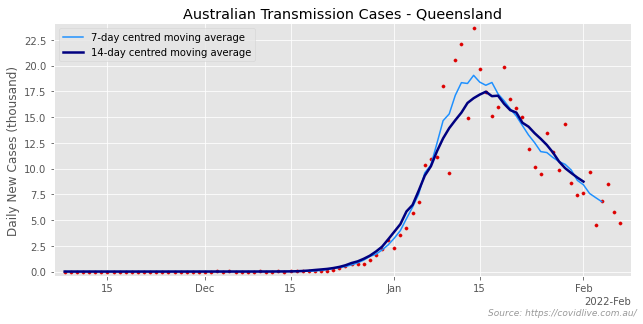

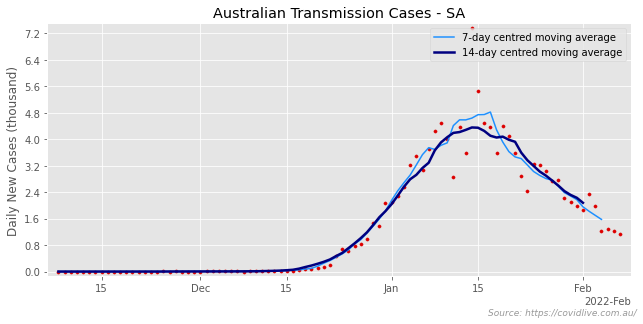

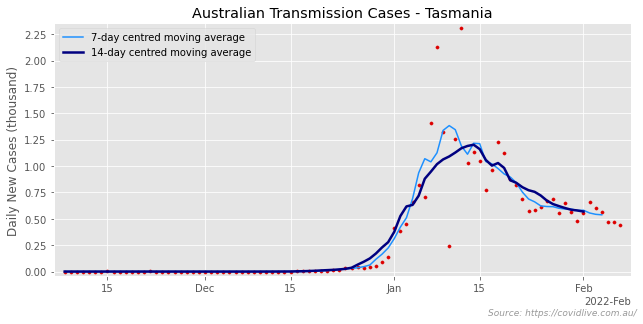

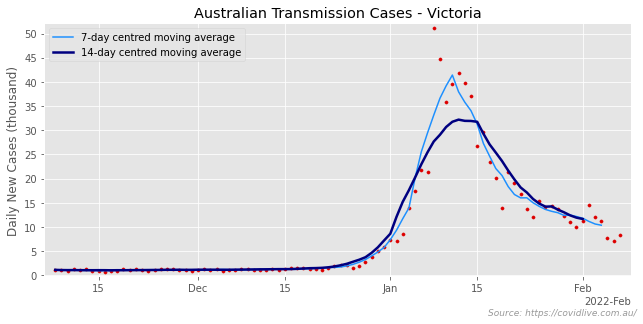

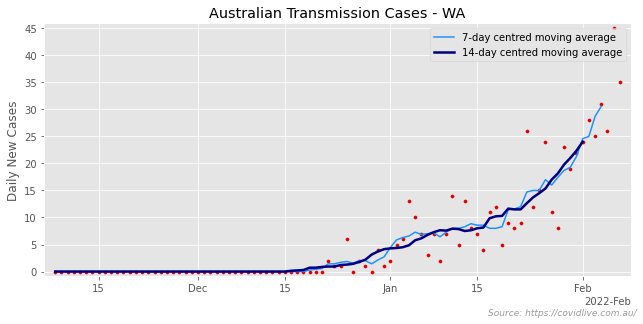

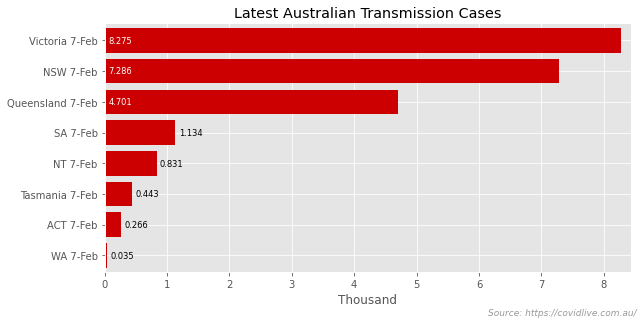

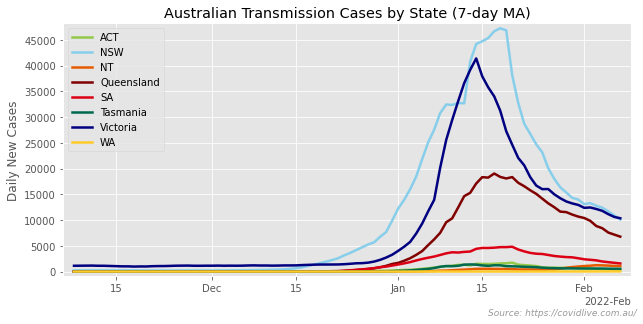

In [46]:
recent_arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': ps.plot_series_with_ma,
}

line_arguments = {
    'color_dict': state_palette,
    'recent': RECENT,
    'lw': 2.5,
    **std_plot_settings,
}

ps.loop_over_frame(daily_c[LOCAL], 'Australian Transmission Cases', 
                ylabel='Daily New Cases', **recent_arguments)

ps.plot_final_barh(daily_c[LOCAL], title=f'Latest Australian Transmission Cases', 
                no_locator=True, force_int=True, scale_x=True,
                    color='#cc0000', **std_plot_settings) 

N = 7
ps.plot_multiline(daily_c[LOCAL].rolling(N).mean(), 
                   title=f"Australian Transmission Cases by State ({N}-day MA)",
                   ylabel='Daily New Cases',
                   **line_arguments
                  )

## Outbreak Growth Factors

### Context

In [47]:
# get a feel for how daily growth rates map to doubling times (in days).
# Note: halving times are negative
r = (
    pd.concat(
        [pd.Series(range(-15,31,5)),
        pd.Series(range(6, 10, 1)),
        pd.Series(range(-9,-5,1)),
        pd.Series([2.5, -2.5])]
    ).sort_values()    
)
dt = {} 
for a in r:
    dt[a] = np.inf if a == 0 else np.log(2) / np.log(1 + a/100)
dt # {percent: doubling time days (-ve = halving time),}

{-15.0: -4.265024281798726,
 -10.0: -6.578813478960585,
 -9.0: -7.349614958201109,
 -8.0: -8.31295041412083,
 -7.0: -9.551337509447336,
 -6.0: -11.202305583621158,
 -5.0: -13.513407333964874,
 -2.5: -27.377851233805632,
 0.0: inf,
 2.5: 28.071034525938728,
 5.0: 14.206699082890461,
 6.0: 11.895661045941875,
 7.0: 10.244768351058712,
 8.0: 9.006468342000588,
 9.0: 8.043231726932046,
 10.0: 7.272540897341713,
 15.0: 4.959484454640391,
 20.0: 3.8017840169239308,
 25.0: 3.10628371950539,
 30.0: 2.6419267958111403}

### New cases - daily growth rate

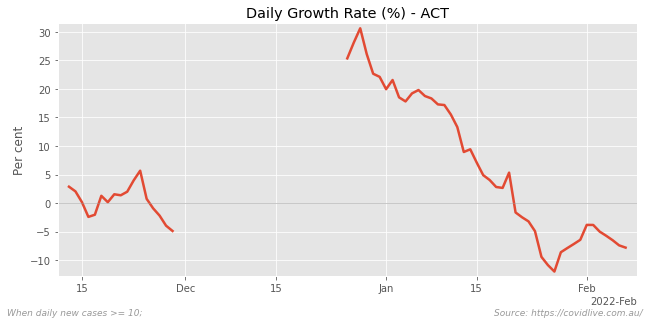

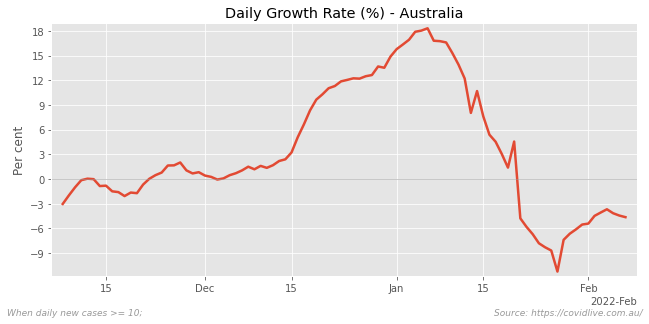

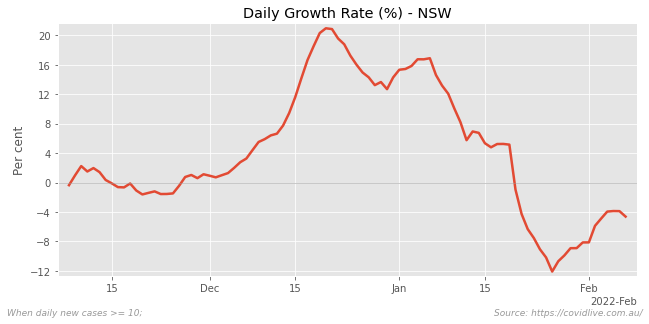

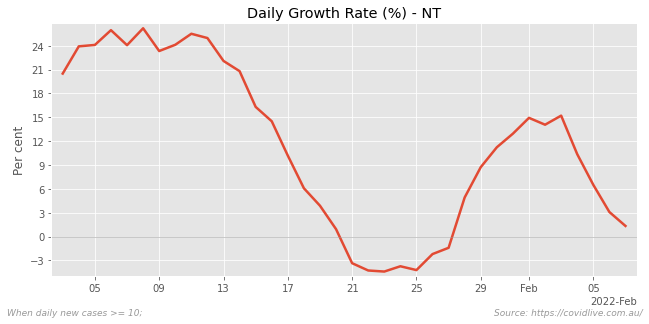

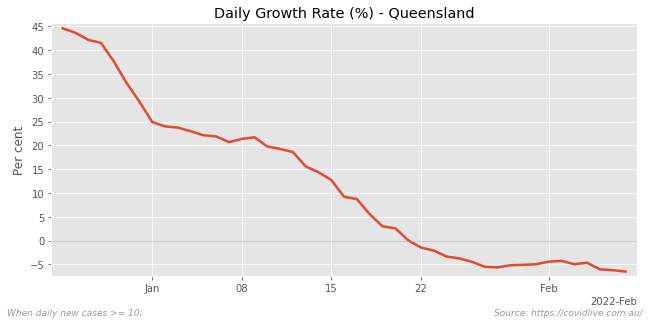

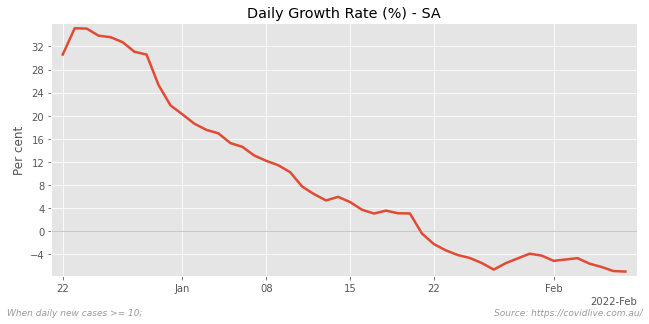

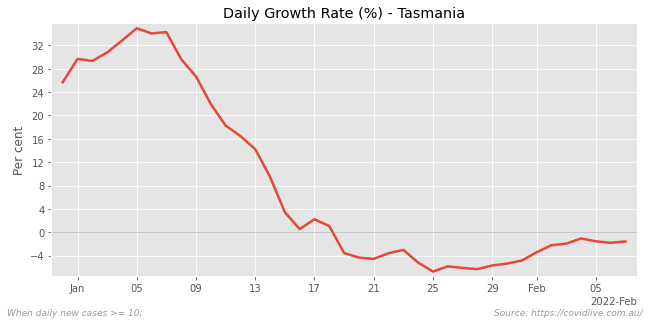

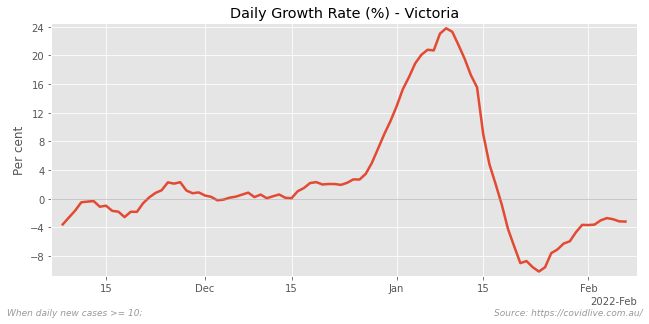

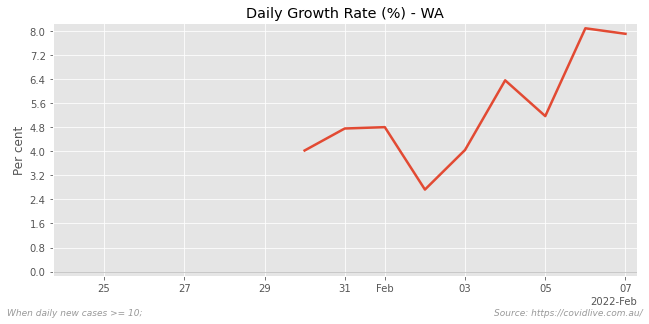

In [48]:
df = daily_c['CASE_CNT']

ps.loop_over_frame(df, 'Daily Growth Rate (%)', ps.daily_growth_rate, 
                   ylabel='Per cent', recent=RECENT, lw=2.5, 
                   **std_plot_settings)

### Five day on five day growth rate - a good proxy for $R_{eff}$

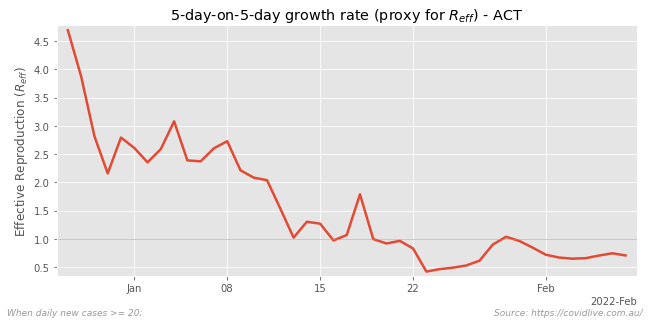

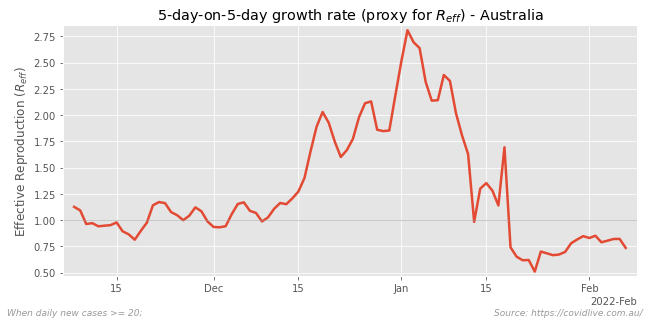

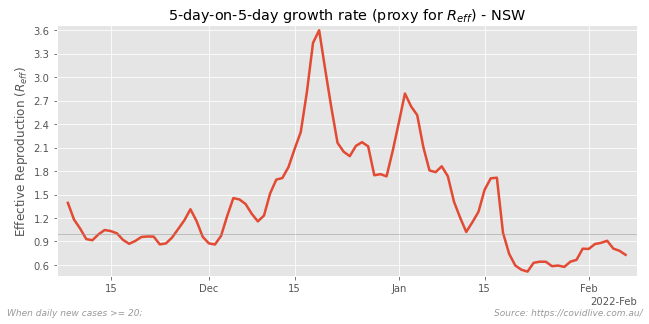

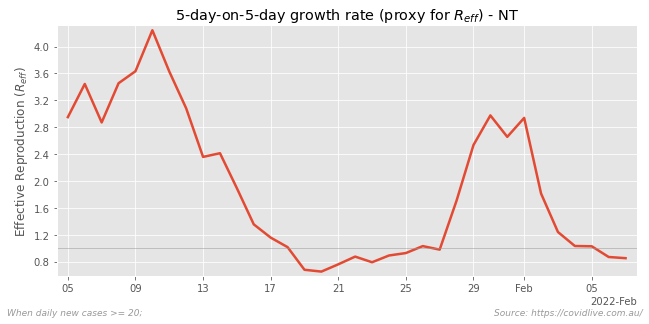

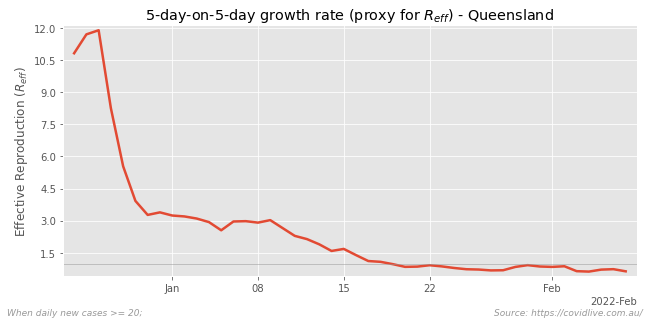

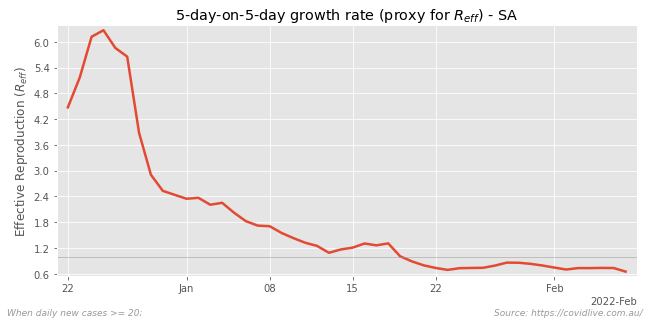

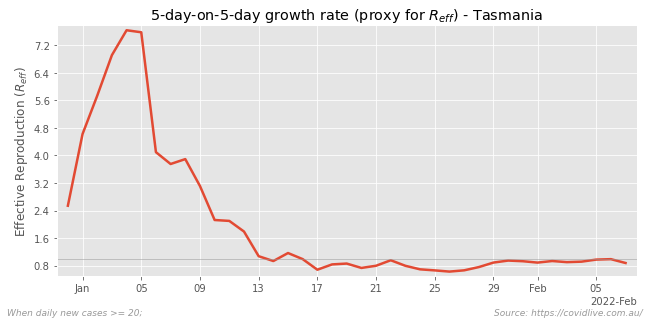

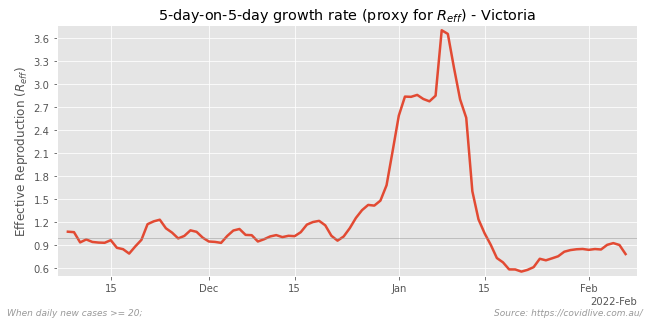

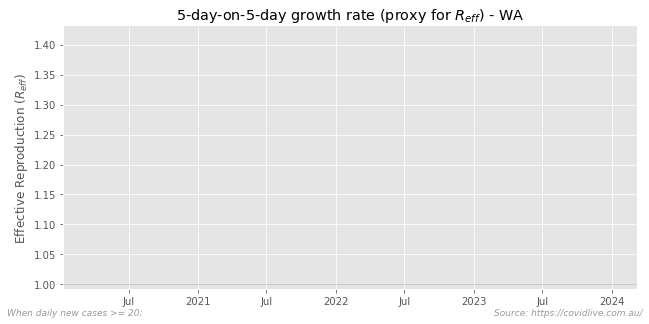

In [49]:
df = daily_c['CASE_CNT']

ps.loop_over_frame(df, 
                '5-day-on-5-day growth rate (proxy for $R_{eff}$)', 
                ps.five_day_on_five_day, 
                ylabel='Effective Reproduction ($R_{eff}$)', 
                recent=RECENT, lw=2.5, **std_plot_settings)

### Short-run projections for local new case growth
$$
y = x_{0}e^{kt}; 
$$
Where ...
$$
k = \frac{ln(\frac{x_t}{x_{t-n}})}{n}
$$

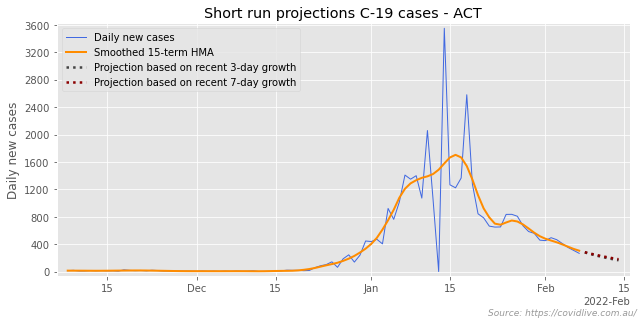

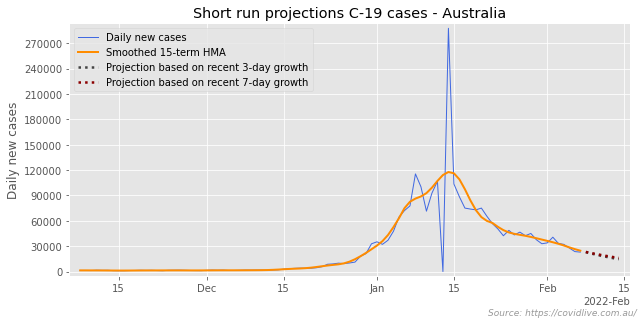

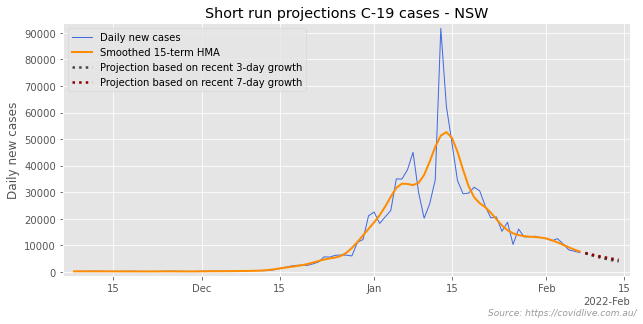

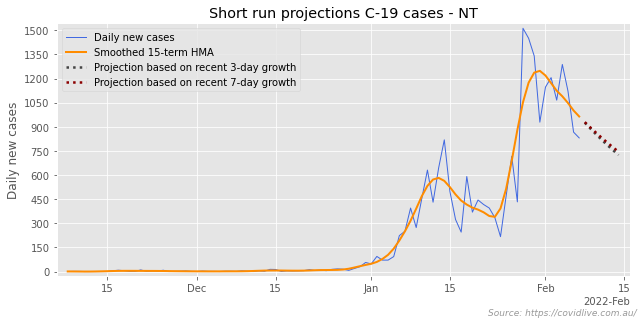

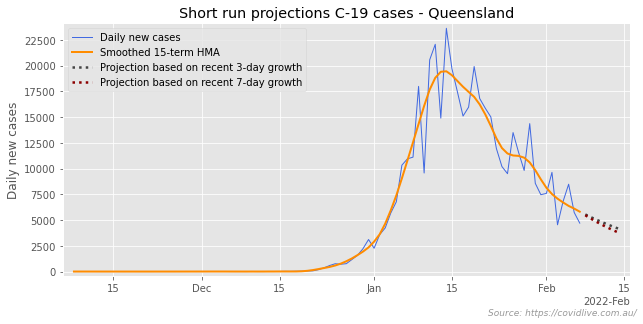

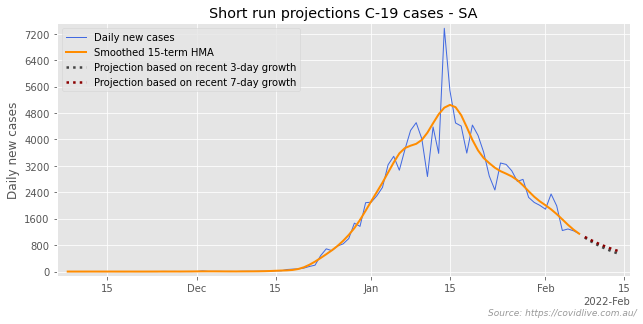

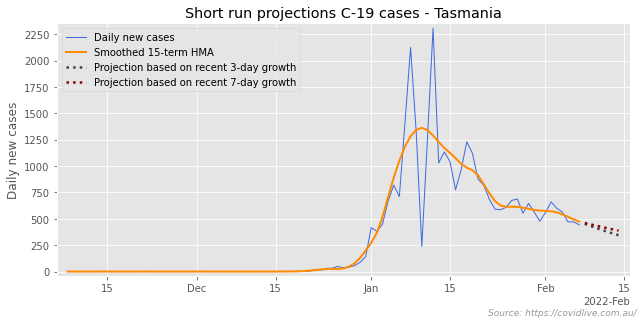

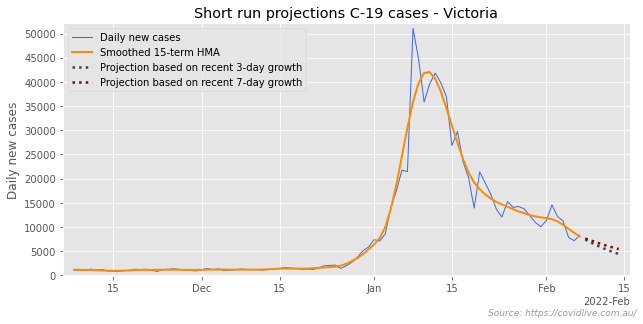

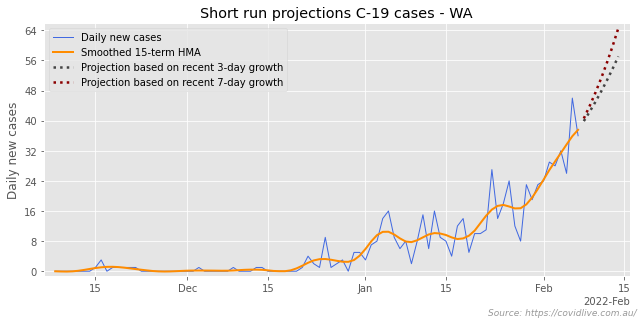

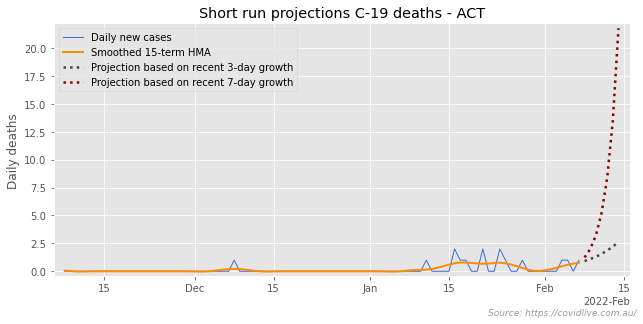

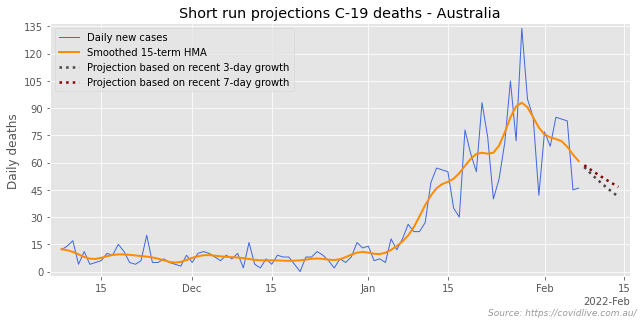

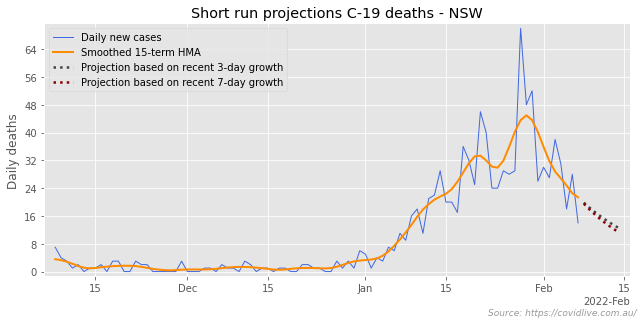

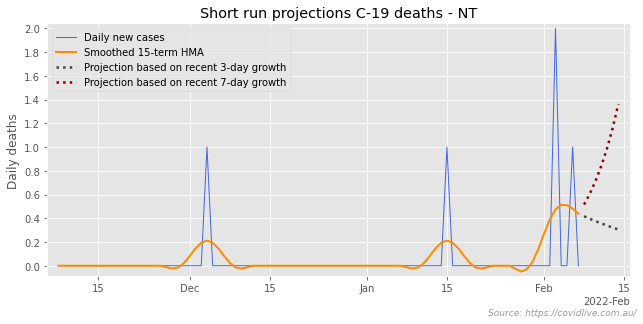

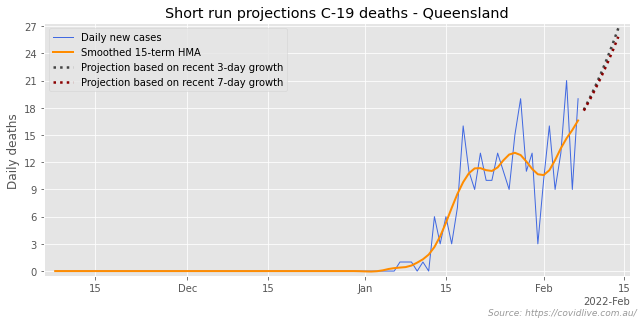

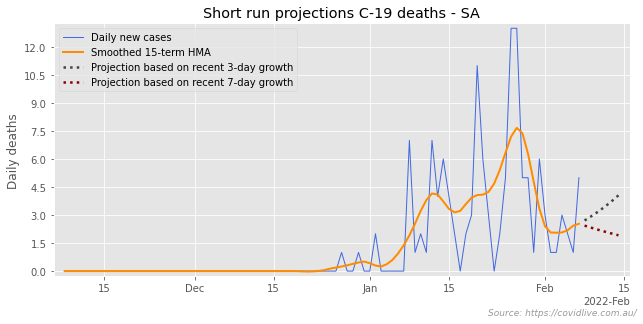

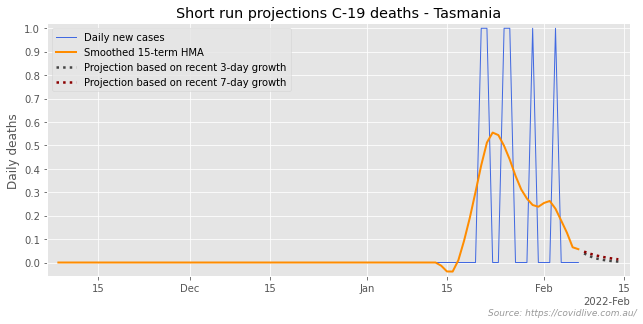

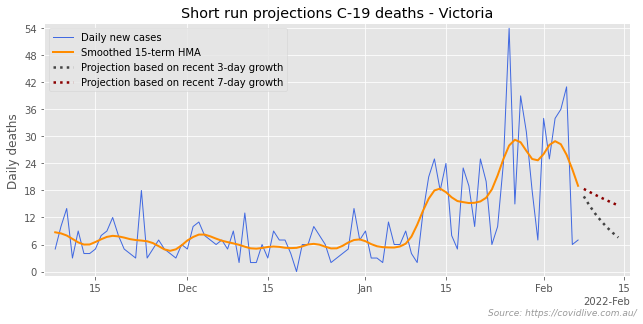

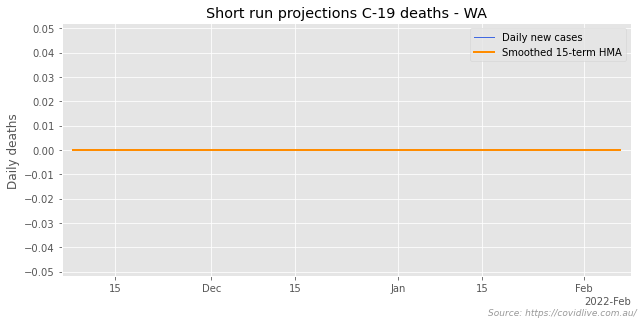

In [50]:
ps.loop_over_frame(daily_c['CASE_CNT'], 
                'Short run projections C-19 cases', 
                ps.short_run_projection, 
                ylabel='Daily new cases', 
                recent=RECENT, **std_plot_settings)

ps.loop_over_frame(daily_c['DEATH_CNT'], 
                'Short run projections C-19 deaths', 
                ps.short_run_projection, 
                ylabel='Daily deaths', 
                recent=RECENT, **std_plot_settings)

## The End

In [51]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Mon Feb 07 2022 20:52:18

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1

json       : 2.0.9
sys        : 3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:28:27) 
[Clang 11.1.0 ]
statsmodels: 0.13.1
pandas     : 1.4.0
autopep8   : 1.6.0
numpy      : 1.22.2
matplotlib : 3.5.1

Watermark: 2.3.0



In [52]:
print_warnings()
print("Finished")

NOTE: 6 warnings
Lastest value less than its predecessor in ACTIVE_CNT for ACT, Australia, NSW, NT, Queensland, SA, Tasmania, Victoria
CASE_CNT mismatch - check the last line of the SOI tables for ['Victoria' 'Queensland' 'SA' 'Tasmania' 'NT']
CASE_CNT mismatch - check the second last line of the SOI tables for ['Victoria' 'Queensland' 'SA' 'Tasmania' 'NT']
Lastest value less than its predecessor in MED_ICU_CNT for Australia, NSW, Queensland, Victoria
Lastest value less than its predecessor in MED_HOSP_CNT for ACT, Australia, NSW, Queensland, Victoria
Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW, Victoria
Finished
